# Statistiques descriptives

# Description univariée

## 1 Préambule

### 1.1 Vocabulaire

- **Individu statistique** : chaque objet sur lequel on effectue des observations.
- **Population ou échantillon** : ensemble des objets étudiés.
- **Variable** : ensemble des valeurs issues de l’observation.
- **jeu de données** : un ou plusieurs ensembles de variables observées.

### 1.2 Codage

- Utilisation de valeurs numériques réelles ou/et entières.
- Utilisation de texte.

### 1.3 Types des variables

- **Variables qualitatives** : pas quantifiables et caractérisées par des modalités comme des catégories ou classes.
- **Variables quantitatives** : quantifiables et utilisent des valeurs numériques réelles.

#### Exercice : Types de variables
- Qualitative nominale --> Code postal de la résidence : 51100, 08200, 51120, 02150, ...
- Quantitative continue --> Taille en cm : 184,164,178,192, ...
- Qualitative nominale --> Série du BAC : G, T, G, G, ...
- Quantitative continue --> Moyenne au S1 : 12.75, 10.5, 8.333, 15.125, ...
- Quantitative discrète --> Satisfaction à propos de la formation : 1, 5, 3, 1, ...

## 2 Préparation des données

#### Exercice : Modification d'une série

In [1]:
def where_none(dat: list) -> list:
    res = []
    for i in range(len(dat)):
        if dat[i] == None:
            res += [i]
    return res

In [2]:
def remove_data(dat: list, pos: list) -> list:
    res = []
    for i in range(len(dat)):
        if i not in pos:
            res += [dat[i]]
    return res

In [3]:
def replace_value(dat: list, value: list, repvalue: list) -> list:
    res = dat.copy()
    for i in range(len(res)):
        for j in range(len(value)):
            if res[i] == value[j]:
                res[i] = repvalue[j]
    return res

In [4]:
data1 = [11,5,6,7,5,2,3,6,None,1,2,5,4,9,6,3,5,8,None]
data2 = ["toto","toto","tata","toto","titi","toto","tata","tata"]
data3 = [None, "None"]

print(where_none(data1))

[8, 18]


In [5]:
print(where_none(data2))

[]


In [6]:
print(where_none(data3))

[0]


In [7]:
print(remove_data(data1,where_none(data1)))

[11, 5, 6, 7, 5, 2, 3, 6, 1, 2, 5, 4, 9, 6, 3, 5, 8]


In [8]:
print(data1)
replace_value(data1,[8,11,None],[-8,-11,0])

[11, 5, 6, 7, 5, 2, 3, 6, None, 1, 2, 5, 4, 9, 6, 3, 5, 8, None]


[-11, 5, 6, 7, 5, 2, 3, 6, 0, 1, 2, 5, 4, 9, 6, 3, 5, -8, 0]

#### Exercice  : Discrétisation

In [9]:
def cut(dat: list, split: list) -> list:
    res = []
    for i in range (len(dat)):
        for j in range(0, len(split)):
            if (dat[i] >= split[j-1]) and (dat[i] <= split[j]):
                res += [f'{split[j-1]}, {split[j]}']
    return res

In [10]:
# Générons des données aléatoires (des float arrondis à 10^-2 entre 0 et 20)
import random
data = [round(random.random()*20,2) for _ in range(10)]
print(data)

[1.65, 16.35, 0.75, 17.47, 8.49, 19.44, 10.91, 18.54, 5.79, 3.35]


In [11]:
# Discrétisation
cut(dat=data, split=[0,5,10,15,20])

['0, 5',
 '15, 20',
 '0, 5',
 '15, 20',
 '5, 10',
 '15, 20',
 '10, 15',
 '15, 20',
 '5, 10',
 '0, 5']

## 3 Statistiques univariées

### 3.1 Distribution groupée

#### Exercice : Distribution groupée

In [12]:
def get_gdistr(dat: list) -> dict:
    dictio = {}
    for i in range(len(dat)):
        if dat[i] in dictio:
            dictio[dat[i]] += 1
        else:
            dictio[dat[i]] = 1
    for j in dictio.keys():
        dictio[j] = (dictio[j], dictio[j]/len(dat))
    return dictio

In [13]:
# Données de test
data = ["toto","toto","tata","toto","titi",
        "toto","tata","tata","toto","toto",
        "toto","toto","titi","toto","titi",
        "tata","toto","tata","tata","toto"]

In [14]:
# Construction de la ditribution groupée
gd_data = get_gdistr(data)

# Affichage
print(gd_data)

{'toto': (11, 0.55), 'tata': (6, 0.3), 'titi': (3, 0.15)}


In [15]:
# Fonction pour un plus chouette affichage
def pprint_gd(gd):
    mod_max_size  = max([len(str(m)) for m in gd.keys()]+[len("Modalité")])
    eff_max_size  = max([len(str(gd[m][0])) for m in gd.keys()]+[len("Effectif")])
    freq_max_size = max([len(str(gd[m][1])) for m in gd.keys()]+[len("Fréquence")])
    print('-'*(mod_max_size+3+eff_max_size+3+freq_max_size+3))
    print("Modalité".ljust(mod_max_size+3,' ')+"Effectif".rjust(eff_max_size+3,' ')+"Fréquence".rjust(freq_max_size+3,' '))
    print('-'*(mod_max_size+3+eff_max_size+3+freq_max_size+3))
    for k in gd.keys():
        print(str(k).ljust(mod_max_size+3,' ')+str(gd[k][0]).rjust(eff_max_size+3,' ')+str(gd[k][1]).rjust(freq_max_size+3,' '))
    return None

In [16]:
pprint_gd(gd_data)

----------------------------------
Modalité      Effectif   Fréquence
----------------------------------
toto                11        0.55
tata                 6         0.3
titi                 3        0.15


In [17]:
# Générons des données aléatoires (des float arrondis à 10^-2 entre 0 et 20)
import random
data = [round(random.random()*20,2) for _ in range(10)]
print("Données initiales : ",data,"\n")
data2 = cut(dat=data, split=[0,5,10,15,20])
print("Données dicrétisées : ",data2,"\n")
print("Tableau de la distribution groupée :")
pprint_gd(get_gdistr(data2))

Données initiales :  [18.29, 18.75, 17.95, 12.36, 10.92, 17.8, 18.23, 14.24, 18.64, 2.52] 

Données dicrétisées :  ['15, 20', '15, 20', '15, 20', '10, 15', '10, 15', '15, 20', '15, 20', '10, 15', '15, 20', '0, 5'] 

Tableau de la distribution groupée :
----------------------------------
Modalité      Effectif   Fréquence
----------------------------------
15, 20               6         0.6
10, 15               3         0.3
0, 5                 1         0.1


### 3.2 Distribution d’une variable quantitative

Indicateurs de position :
- **Moyenne** : somme des valeurs de la série divisé par leur nombre.
- **Médiane** : la valeur qui sépare la série en deux parties de même effectif.
- **Quantile** : la valeur qui sépare la série en deux parties (proportion p ou p*100% de valeurs dans la première partie).

Indicateurs de dispersion :
- **Ecart-type** : la racine carrée de la moyenne des écarts au carré, entre les valeurs et leur moyenne.
- **Coefficient de variation** : le rapport entre l’écart-type et la moyenne, exprimé comme un pourcentage de la moyenne.
- **Etendue** : différence entre la plus grande valeur de la série et la plus petite.
- **Ecart interquartiles** : différence entre le quantile à 0,75 et le quantile à 0,25.

Indicateurs de forme :
- **Coefficient d’asymétrie de Pearson** : 3 multiplié par la différence entre la moyenne et la médiane, divisée par l’écart-type.
- **Coefficient d’applatissement (kurtosis)** : moyenne des écarts entre les valeurs et leur moyenne, élevés à la puissance 4, divisée par l’écart-type à la puissance 4.

#### Exercice : Calcul des indicateurs

In [76]:
def mean(dat: list) -> float:
    res = 0
    for valeur in dat:
        res += valeur
    return res/len(dat)

In [77]:
def quantile(dat: list, p: int) -> float:
    dat2 = sorted(dat)
    index = (len(dat2) - 1) * p
    if index.is_integer():
        res = dat2[int(index)]
    else:
        i = int(index)
        res = dat2[i] * (i+1-index) + dat2[i+1] * (index-i)
    return res

In [78]:
def median(dat: list) -> float:
    return quantile(dat, 0.5)

In [79]:
def stdev(dat: list) -> float:
    ecarts = []
    for value in dat:
        ecarts.append((value - mean(dat))**2)
    return mean(ecarts)**0.5

In [80]:
def cofvar(dat: list) -> float:
    e = 0
    for value in data:
        e += (value - mean(dat))**2
    s = (e / len(dat))**0.5
    return (s / mean(dat)) * 100

In [81]:
def valrange(dat: list) -> float:
    return max(dat) - min(dat)

In [82]:
def iquarange(dat: list) -> float:
    return quantile(dat, 0.75) - quantile(dat, 0.25)

In [83]:
# Génération de données aléatoires
import random
data = [round(random.random()*20,2) for _ in range(25)]

# Affichage des inficateurs
print("Moyenne         : ",round(mean(data),2))
print("Médiane         : ",round(median(data),2))
print("Écart-type      : ",round(stdev(data),2))
print("Coef. de var.   : ",round(cofvar(data),2))
print("Étendue         : ",round(valrange(data),2))
print("Éc. interquart. : ",round(iquarange(data),2))
print("Prem.  quartile : ",round(quantile(data,0.25),2))
print("Trois. quartile : ",round(quantile(data,0.75),2))

Moyenne         :  8.87
Médiane         :  8.7
Écart-type      :  5.74
Coef. de var.   :  64.77
Étendue         :  18.57
Éc. interquart. :  11.34
Prem.  quartile :  3.09
Trois. quartile :  14.43


#### En bref : Indicateurs

Variables **quantitatives** :
- Indicateur de position : la **moyenne**, la **médiane** et les **quantiles**
- Indicateur de dispersion : L'**écart-type**, le **coefficient de variation**, l’**étendue** et l’**écart interquartile**

Variables **qualitatives** :
- Effectifs
- Fréquences pour chacune des classes

### 3.3 Représentations graphiques

In [111]:
import matplotlib.pyplot as plt
# Si vous voulez augmenter la qualité des images produites :
plt.rcParams['figure.dpi']= 300

#### 3.3.1 Diagramme à barre

In [112]:
# Données de test
data = ["toto","toto","tata","toto","titi",
        "toto","tata","tata","toto","toto",
        "toto","toto","titi","toto","titi",
        "tata","toto","tata","tata","toto"]

# Extraction de la distribution groupée
data_gd = get_gdistr(data)

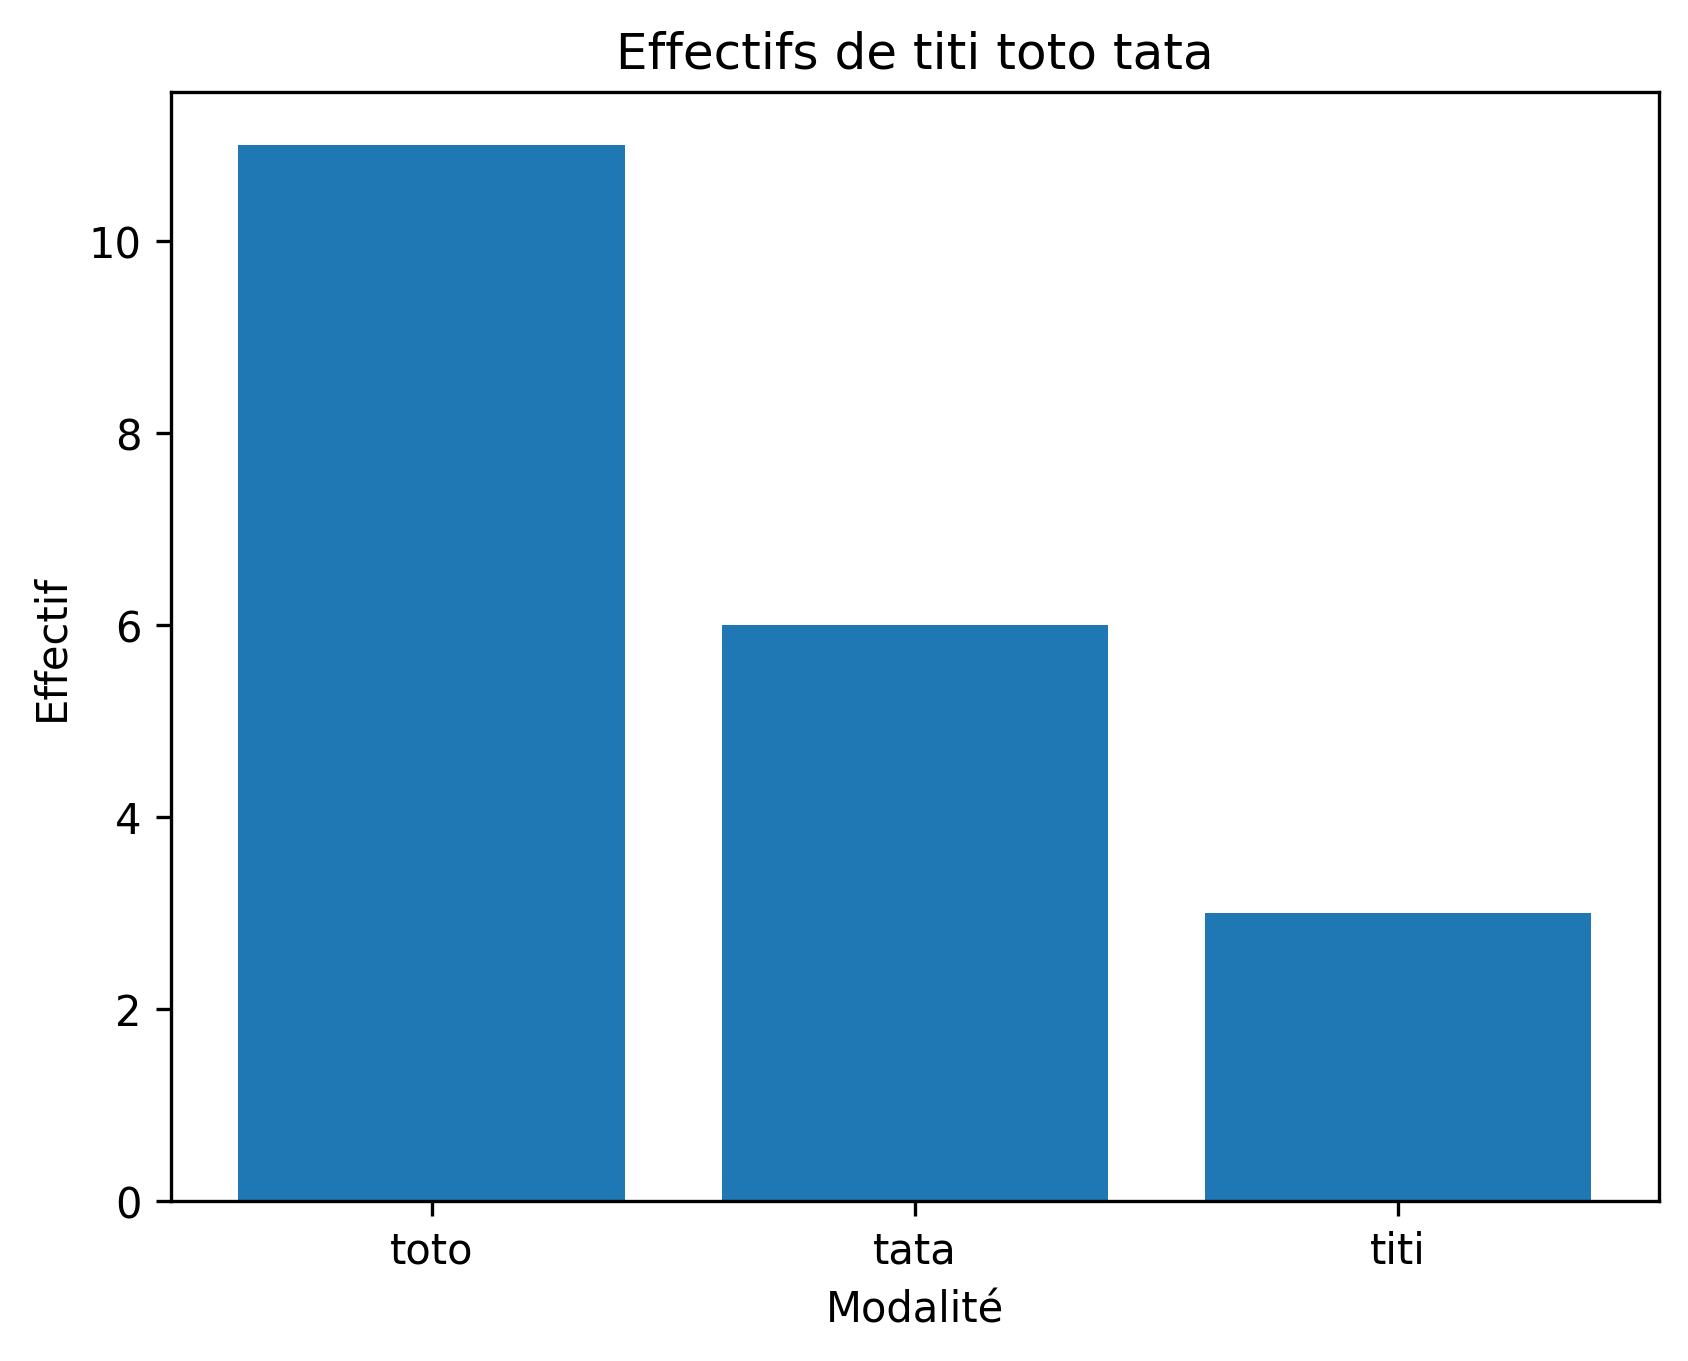

In [113]:
# On récupère les modalités
classes = list(data_gd.keys())
# On récupère les effectifs pour s'en servir comme hauteurs des barres
heights = [data_gd[c][0] for c in classes]
# Production du barplot
plt.figure()
plt.bar(classes,heights)
plt.title("Effectifs de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
# Affichage
plt.show()

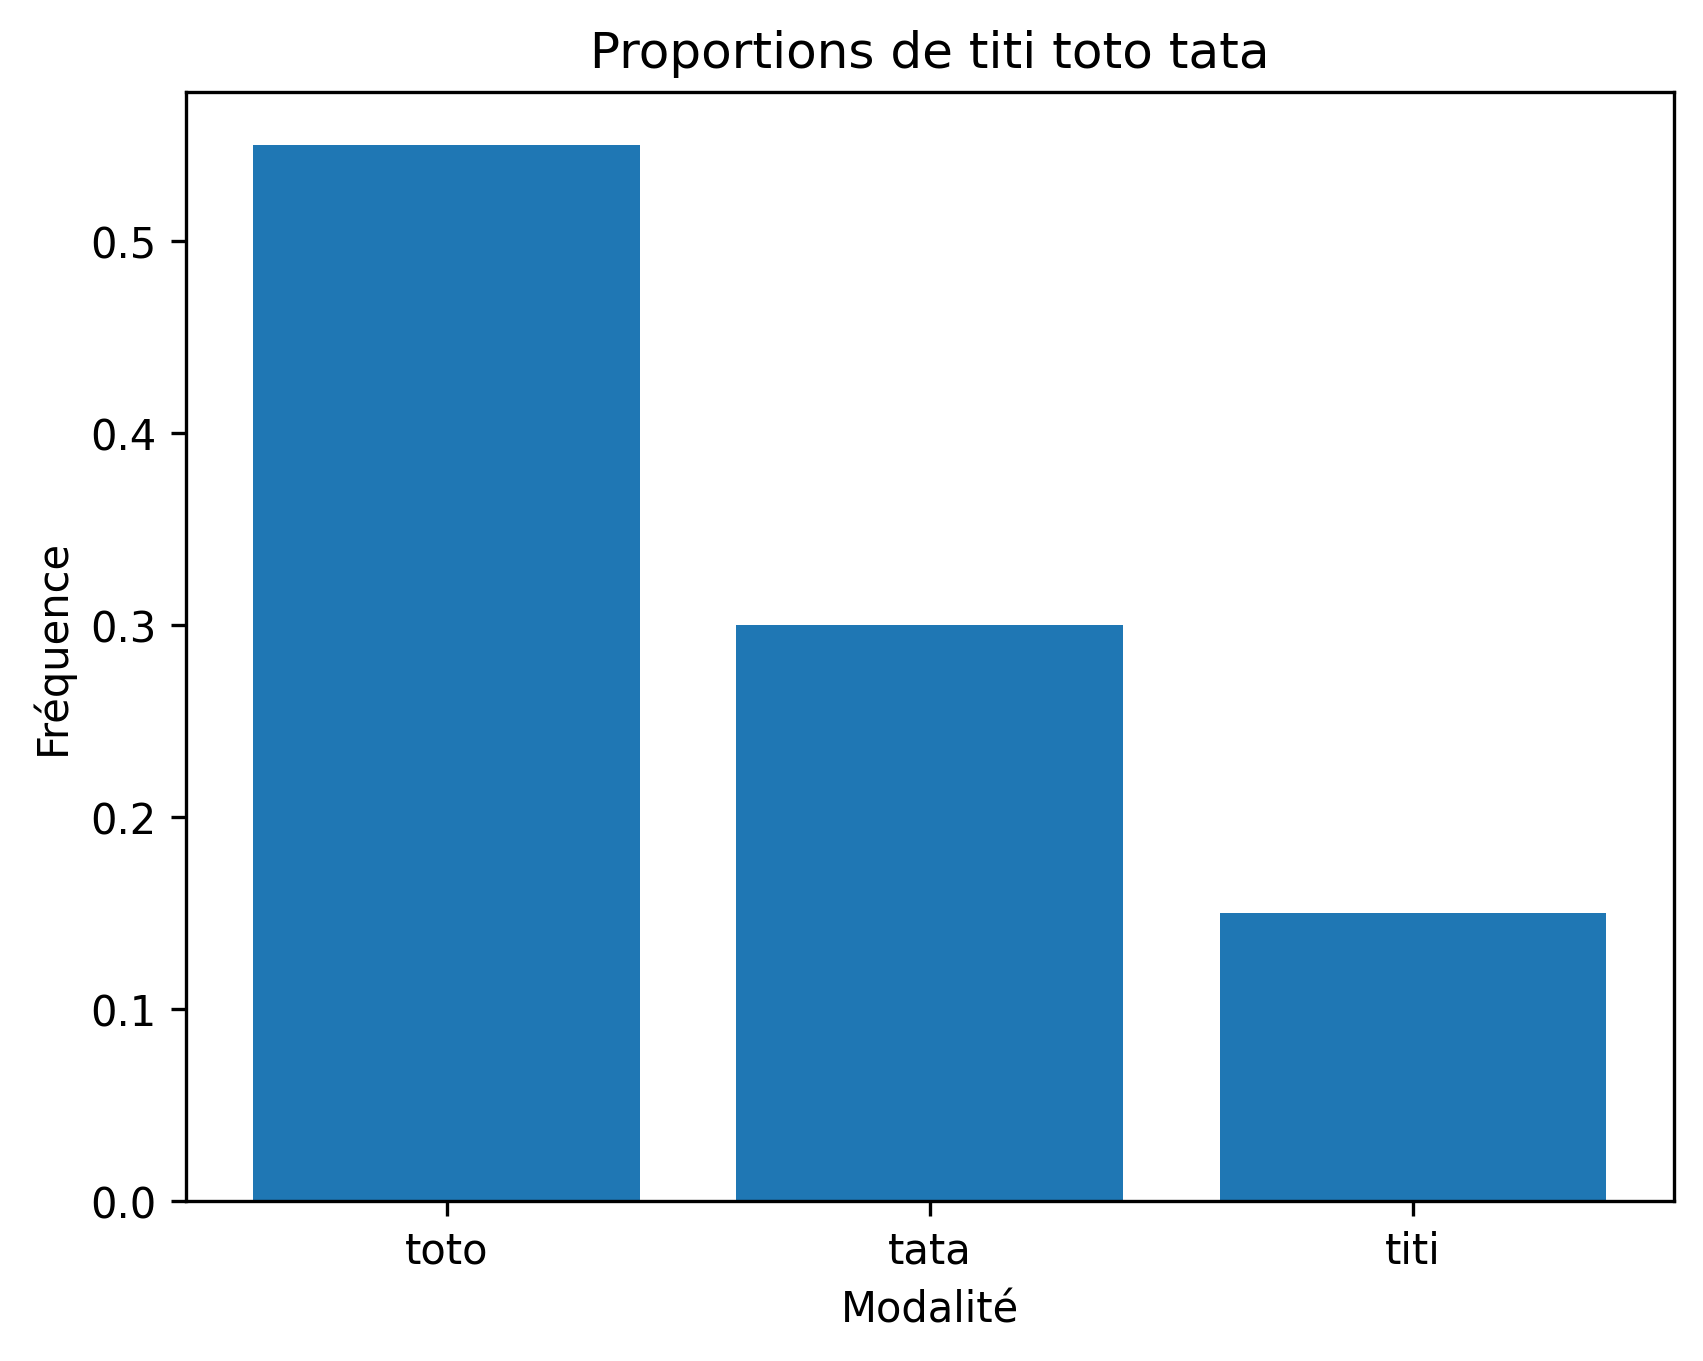

In [114]:
# On récupère les fréquences pour s'en servir comme hauteurs des barres
heights = [data_gd[c][1] for c in classes]
# Production du barplot
plt.figure()
plt.bar(classes,heights)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Fréquence")
# Affichage
plt.show()

#### 3.3.2 Diagramme à secteurs

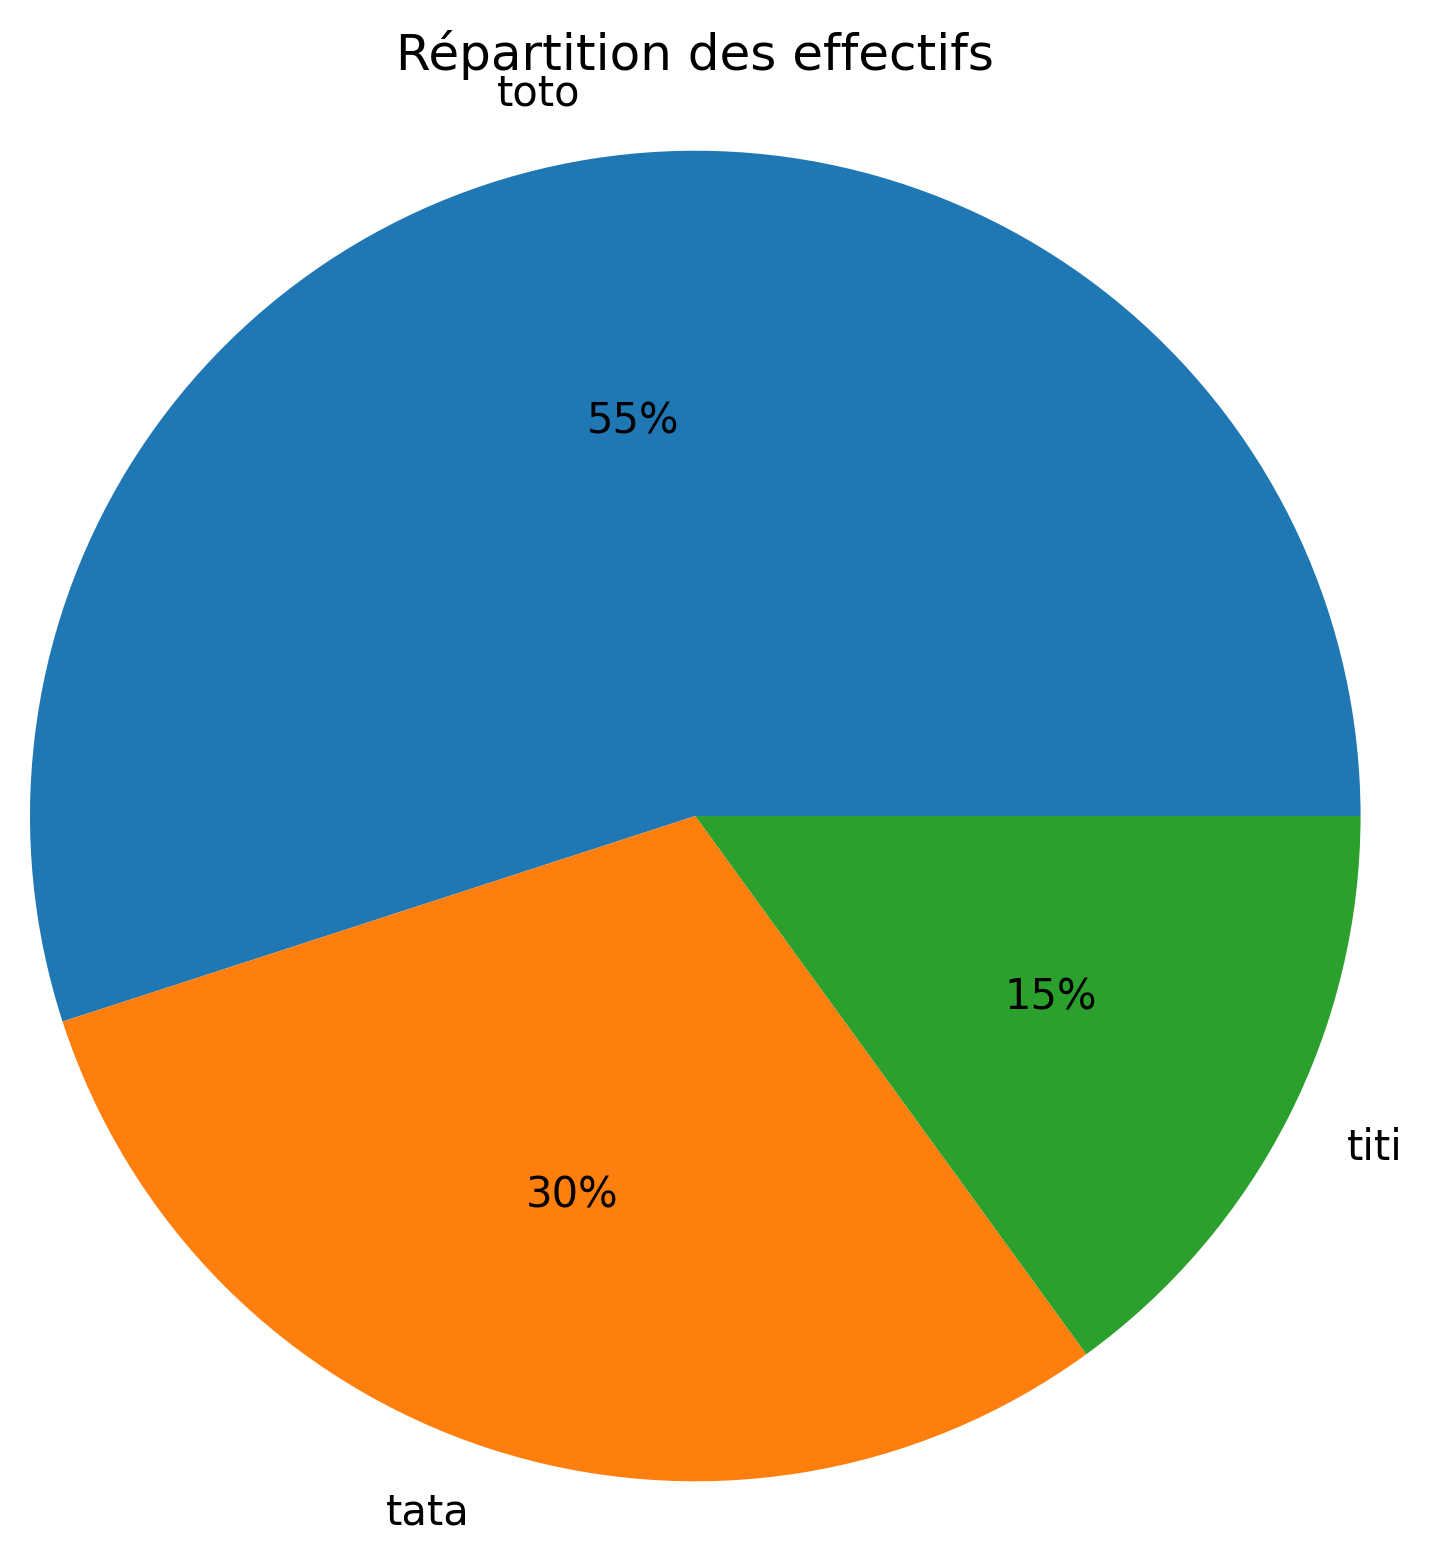

In [115]:
# On récupère les fréquences dans le tableau de la distribution groupé
props = [data_gd[c][1] for c in classes]
# PRoduction du graphique
plt.figure()
plt.title('Répartition des effectifs\n\n\n')
plt.pie(props, labels=classes,
        autopct='%.0f%%',
        radius=1.5)
# Affichage
plt.show()

#### 3.3.3 Histogramme

In [116]:
# Génération de 59 notes aléatoires entre 0 et 20
data = [round(random.random()*20,2) for _ in range(50)]
print(data)

[0.03, 6.56, 2.14, 2.18, 10.29, 8.3, 8.77, 2.09, 11.91, 13.22, 14.92, 7.97, 16.44, 1.18, 18.43, 19.63, 2.71, 6.07, 3.29, 10.41, 3.59, 14.28, 4.73, 7.39, 18.61, 8.2, 5.34, 1.85, 15.46, 6.21, 8.87, 17.8, 16.27, 15.77, 13.19, 1.66, 16.51, 13.1, 15.49, 0.01, 11.49, 2.03, 1.73, 8.58, 0.62, 5.04, 16.41, 13.48, 5.81, 5.37]


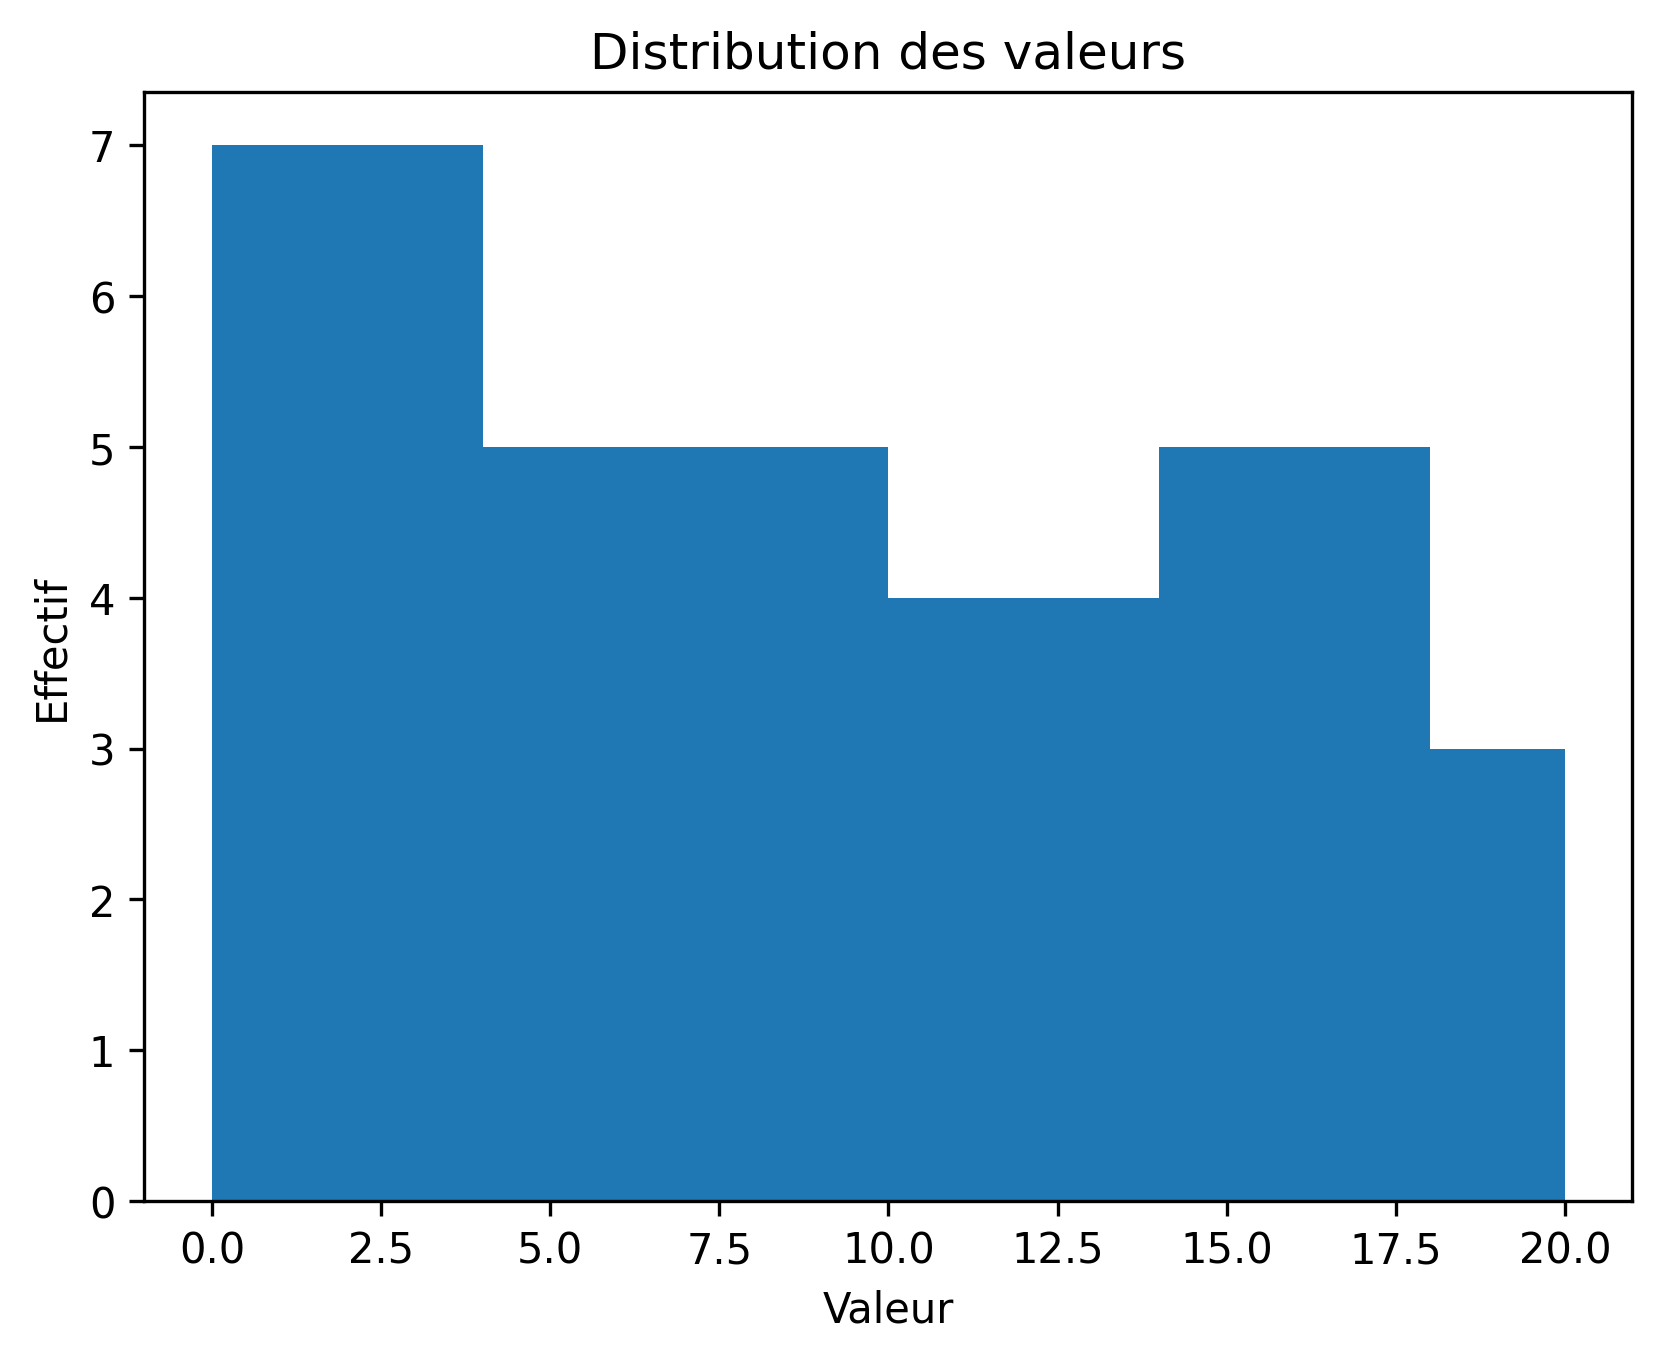

In [117]:
# Production de l'histogramme 
# Ke second argument est la liste des "coupes" utilisées pour la discrétisation
# On peut fournir à la pkace, le nombre de barres (nombre d'intervalles)
plt.figure()
plt.hist(data, [0,2,4,6,8,10,12,14,16,18,20])
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

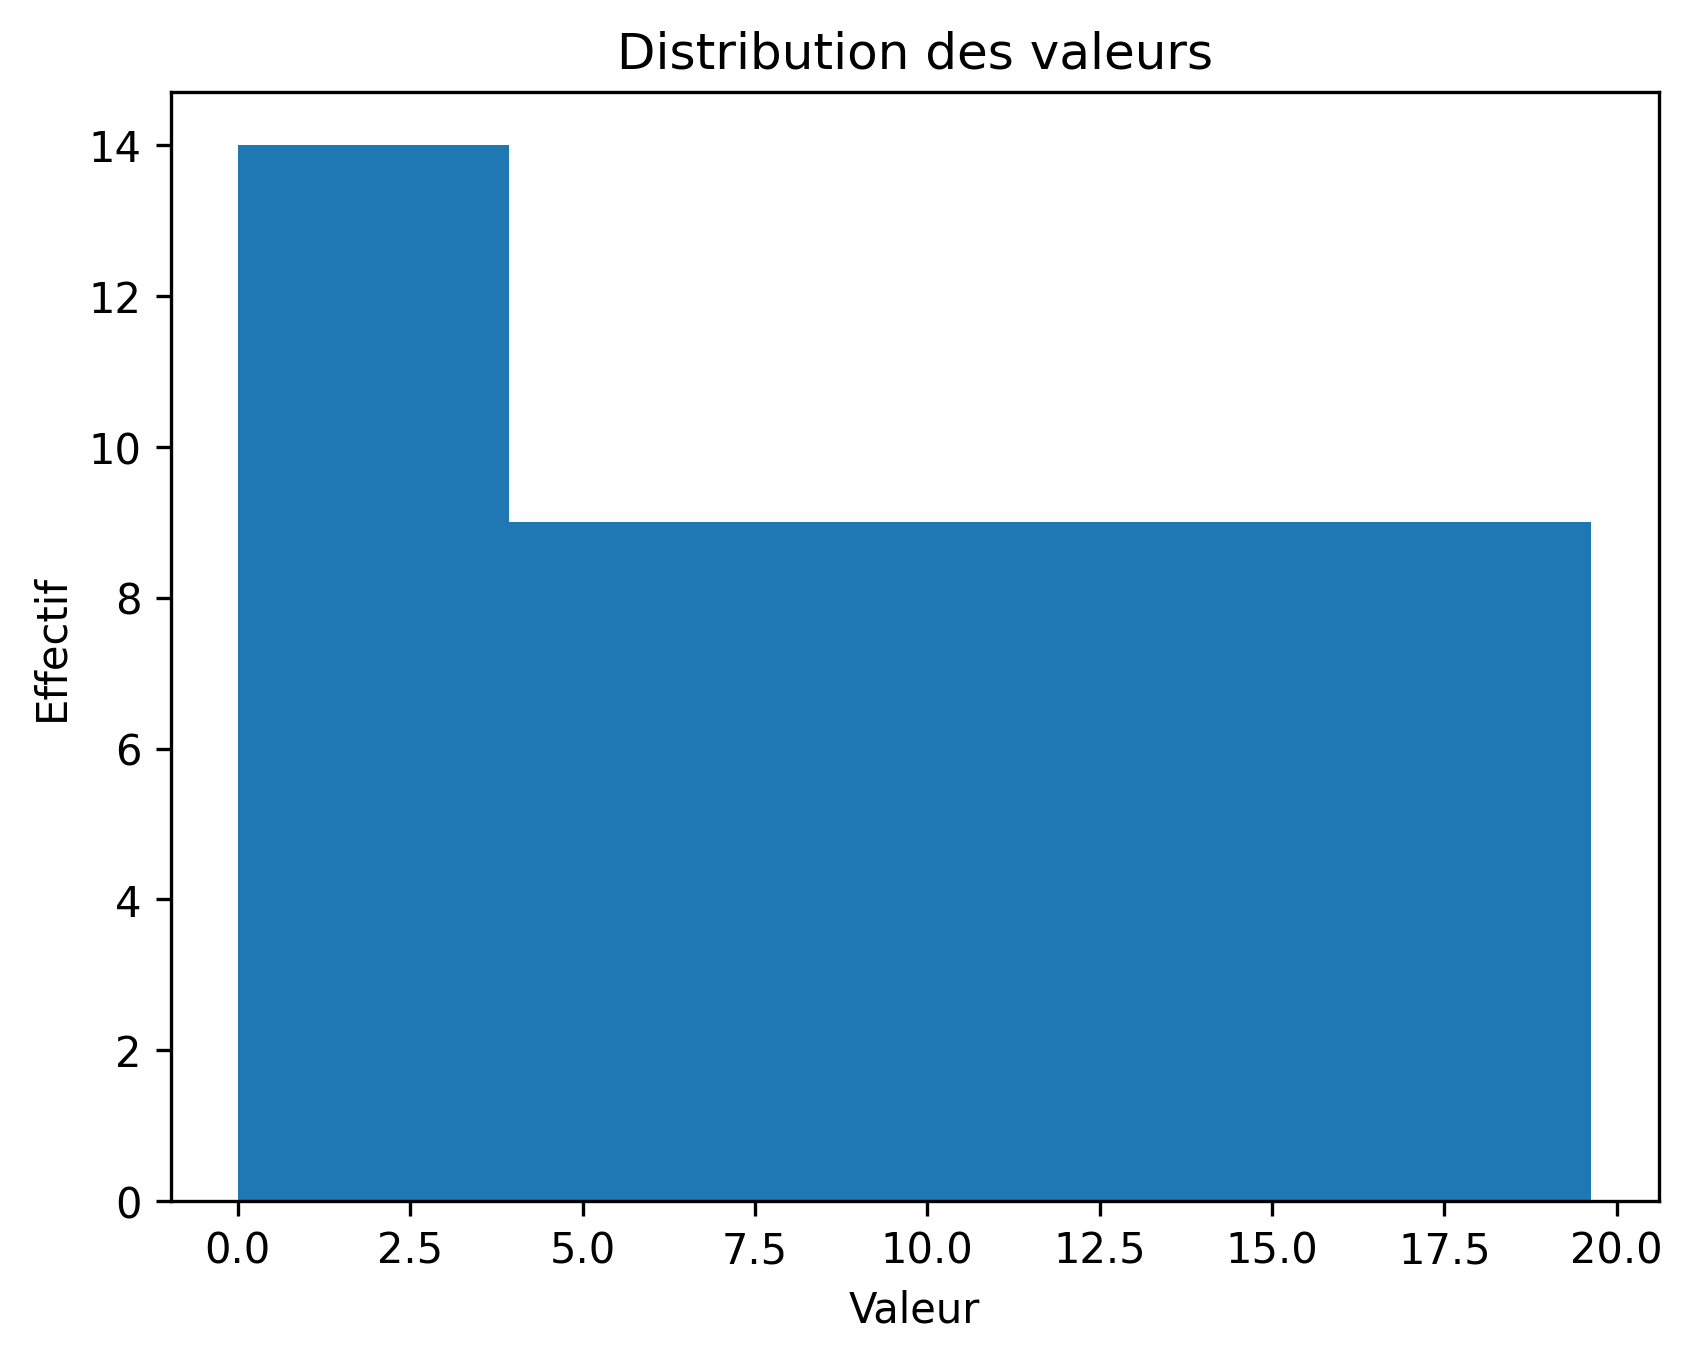

In [118]:
# Production de l'histogramme 
# Ke second argument est la liste des "coupes" utilisées pour la discrétisation
# On peut fournir à la pkace, le nombre de barres (nombre d'intervalles)
plt.figure()
plt.hist(data, 5)
plt.title("Distribution des valeurs")
plt.ylabel("Effectif")
plt.xlabel("Valeur")
plt.show()

#### 3.3.4 Boîte à moustaches

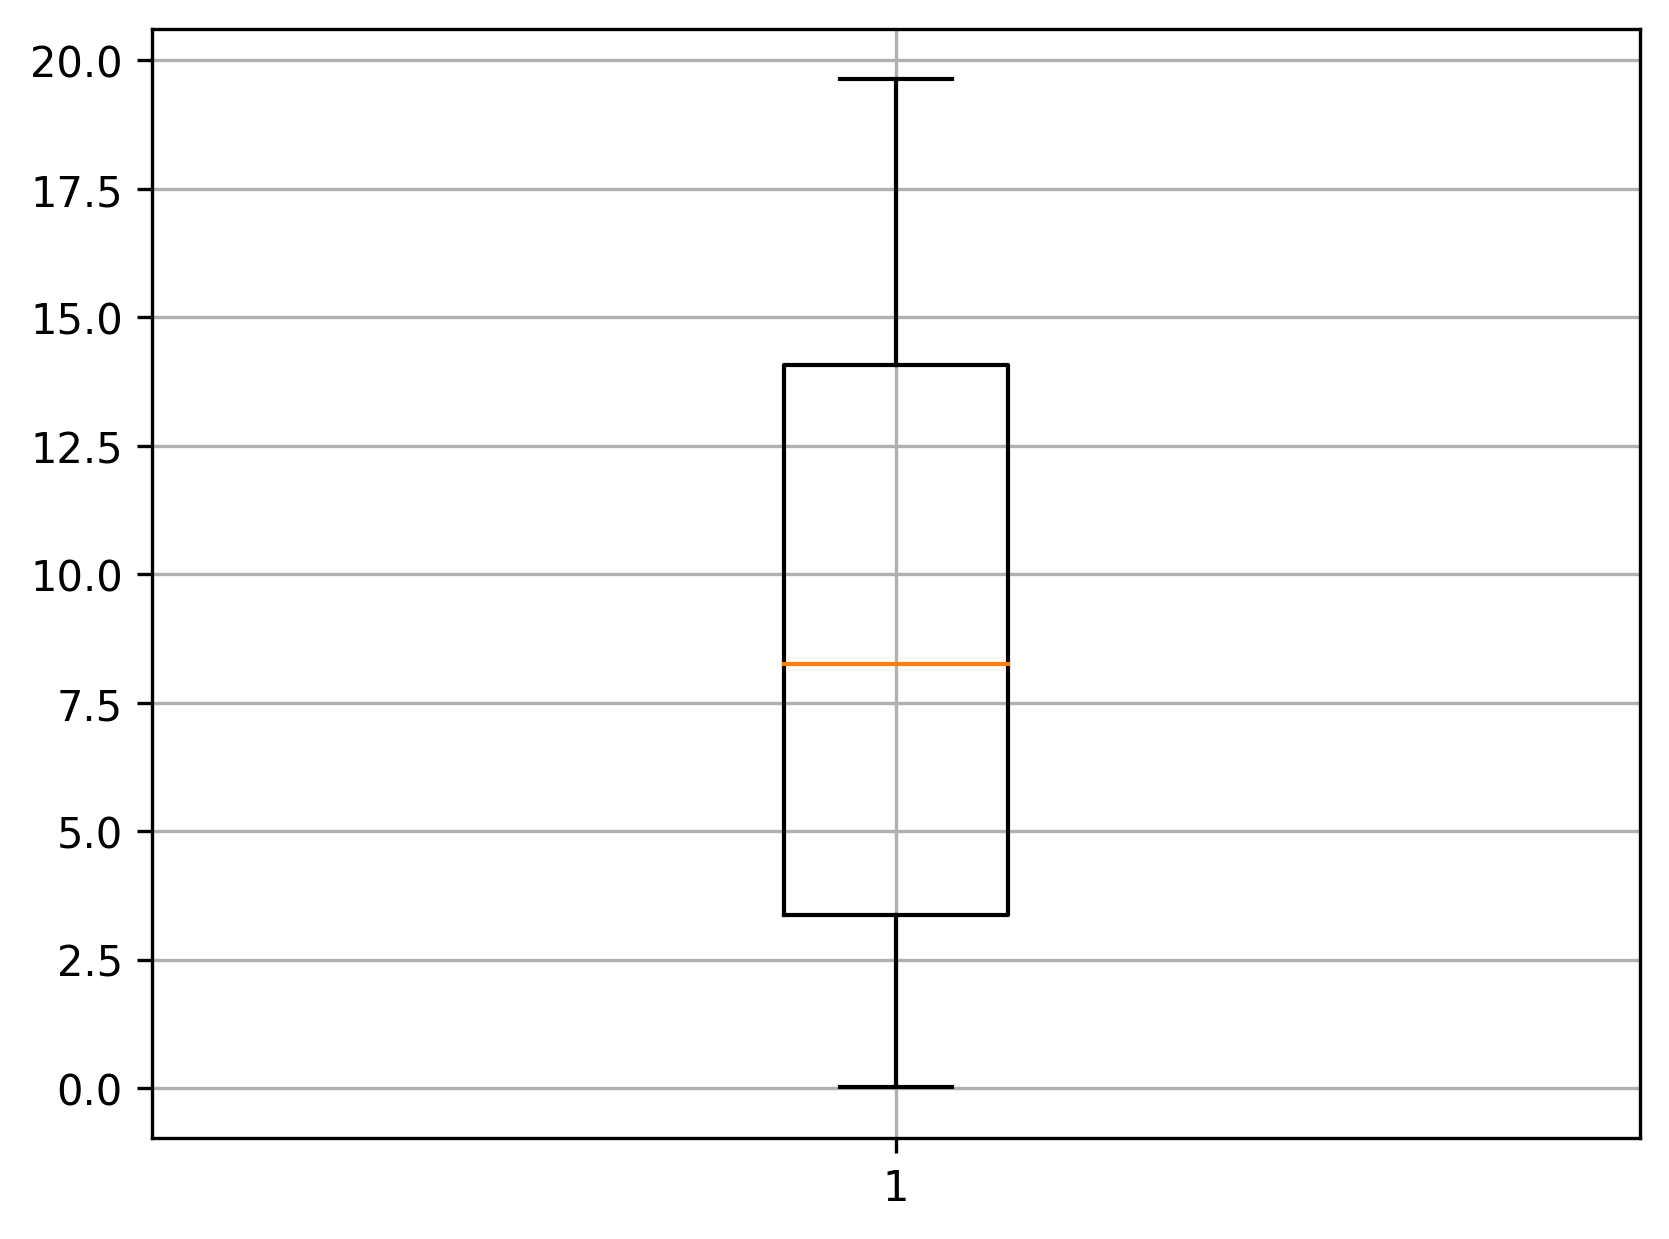

In [119]:
# Production du boxplot
fig = plt.figure()
plt.boxplot(data)
plt.grid()
# Affichage
plt.show()

#### En bref : Graphiques

Variables **quantitatives** :
- **Histogrammes**
- **Boîtes à moustaches**

Variables **qualitatives** :
- **Diagrammes à barres**
- **Diagrammes à secteurs**

### 3.4 Pour aller un peu plus loin (facultatif)

#### 3.4.1 Personnalisation

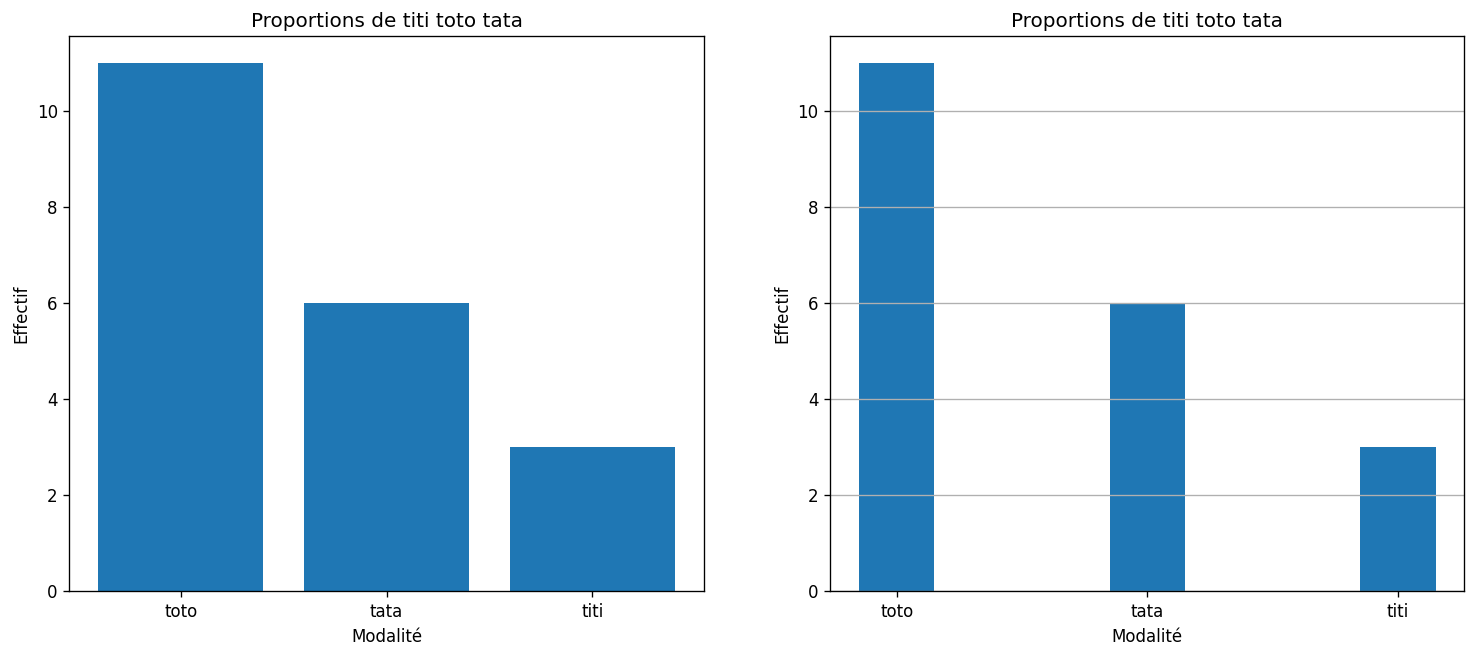

In [120]:
plt.figure(figsize=(15, 6), dpi=120)
heights = [data_gd[c][0] for c in classes]
plt.style.use('default')
# subplot permet de diviser une figure en un tableau de sous-figures
# le premier argument est le nombre de lignes de ce tableau, 
# le second le nombre de colonnes
# le troisième correspond au numéro de la cellule que l'on sélectionne
# ici :
#      +---+---+
#      | 1 | 2 |
#      +---+---+
#

# Premier graphique
plt.subplot(1, 2, 1)
plt.bar(classes, heights)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")

# Second graphique
plt.subplot(1, 2, 2)
plt.bar(classes, heights, width = 0.3)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
plt.grid(axis='y')

# Affichage
plt.show()

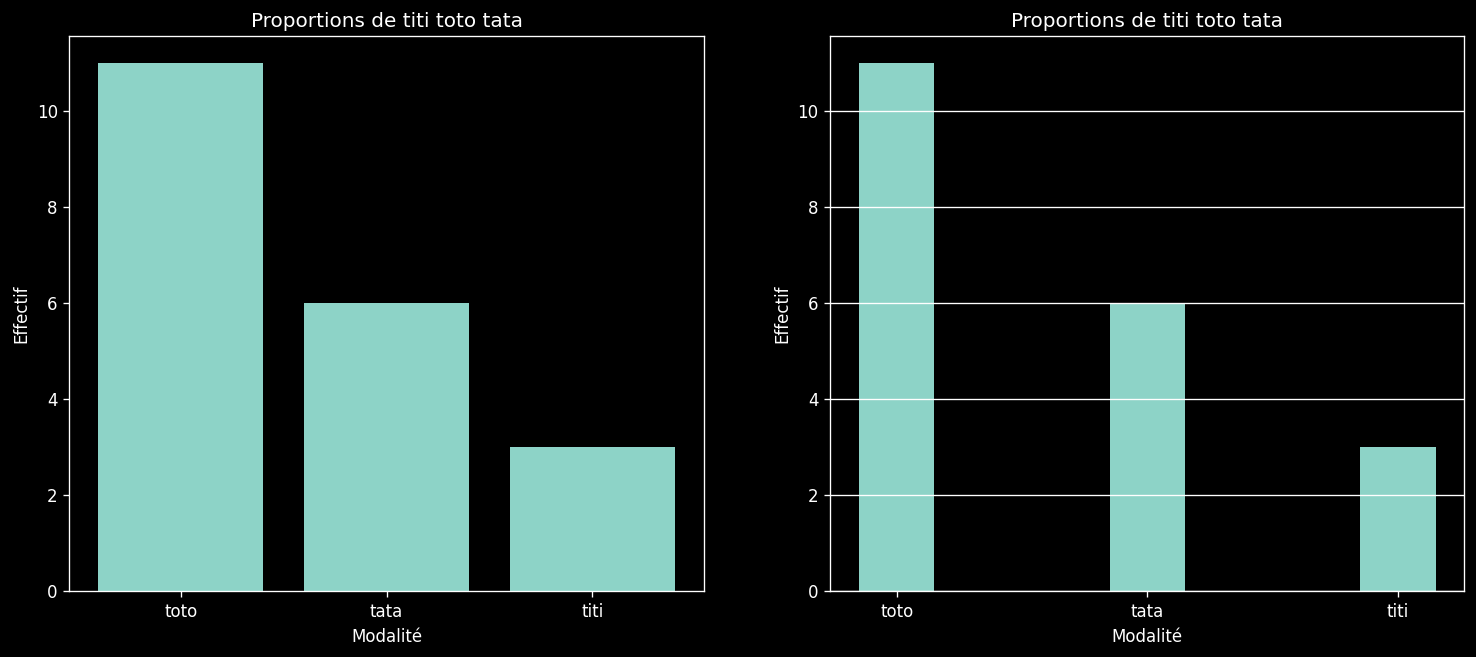

In [121]:
# Changement de style pour l'ensemble des graphiques à venir
plt.style.use('dark_background')
plt.figure(figsize=(15, 6), dpi=120)

plt.subplot(1, 2, 1)
plt.bar(classes, heights)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")

plt.subplot(1, 2, 2)
plt.bar(classes, heights, width = 0.3)
plt.title("Proportions de titi toto tata")
plt.xlabel("Modalité")
plt.ylabel("Effectif")
plt.grid(axis='y')

plt.show()

# Restaurer le style pour les graphiques suivants
plt.style.use('default')
plt.rcParams["figure.dpi"] = 300

#### 3.4.2 Data-Ink Ratio

Le texte parle de l'**impact des choix graphiques dans la création de visualisations de données** et de l'importance de **maximiser le ratio encre utilisée** pour les données par rapport à la quantité totale d'encre utilisée pour le graphique, selon les principes d'Edward Tufte, un expert en visualisation de données.

Il soutient que **seuls les éléments graphiques** qui sont **indispensables** pour la compréhension des données **doivent être affichés**, et que **tout élément inutile** doit être **éliminé** pour éviter de **biaiser la perception** du lecteur.

En opposition à ces principes, il y a les **infographies modernes**, qualifiées de "chartjunk", qui sont souvent **surchargées d'éléments visuels inutiles**.

## 4 Problèmes et mise en pratique

### 4.1 Représentations graphiques

**Graphique 1** :
- Mauvaise lisibilité
- Utilisation de la 3D
- Trop grande différence entre 1000 et 1250

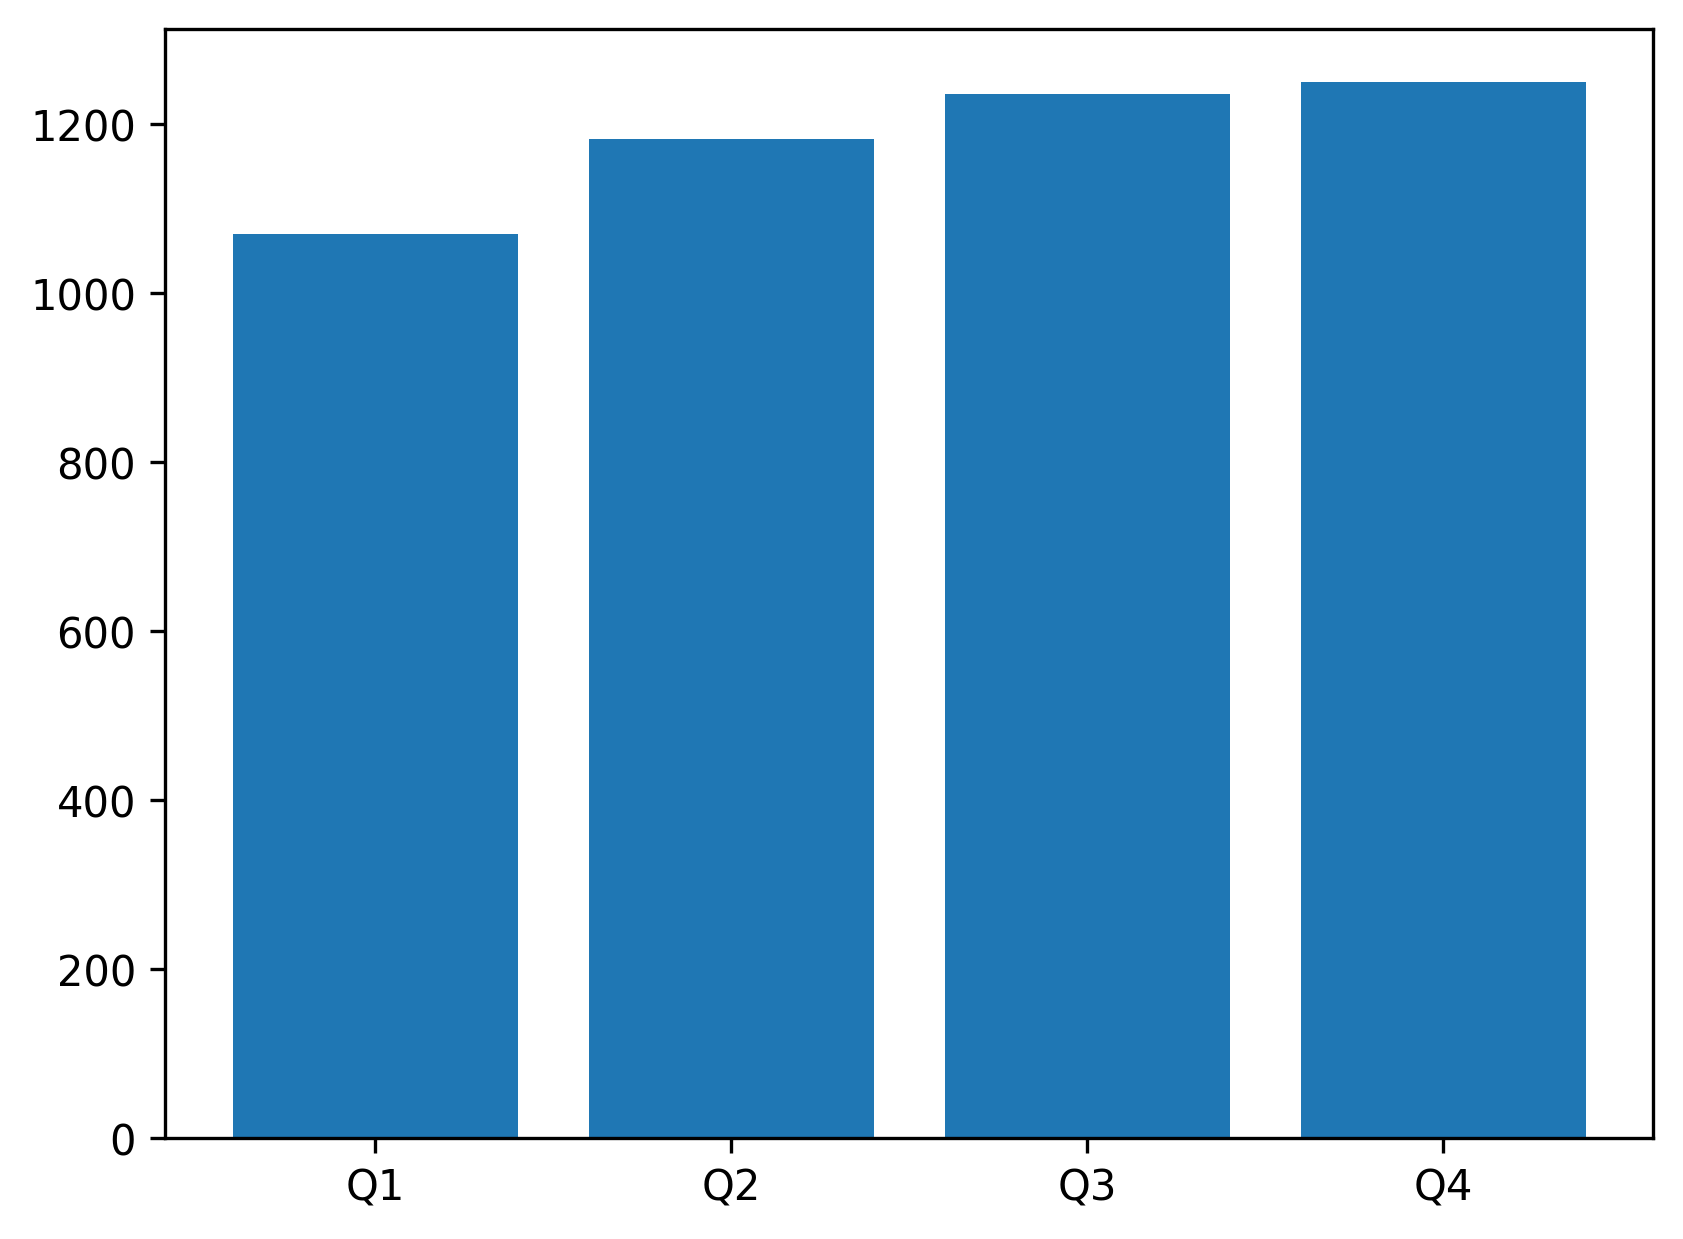

In [126]:
titres = ['Q1', 'Q2', 'Q3', 'Q4']
infos = [1070, 1182, 1236, 1250]
plt.figure()
plt.bar(titres, infos)
plt.show()

**Graphique 2** :
- Mauvaise lisibilité
- Titres des parties trop loin

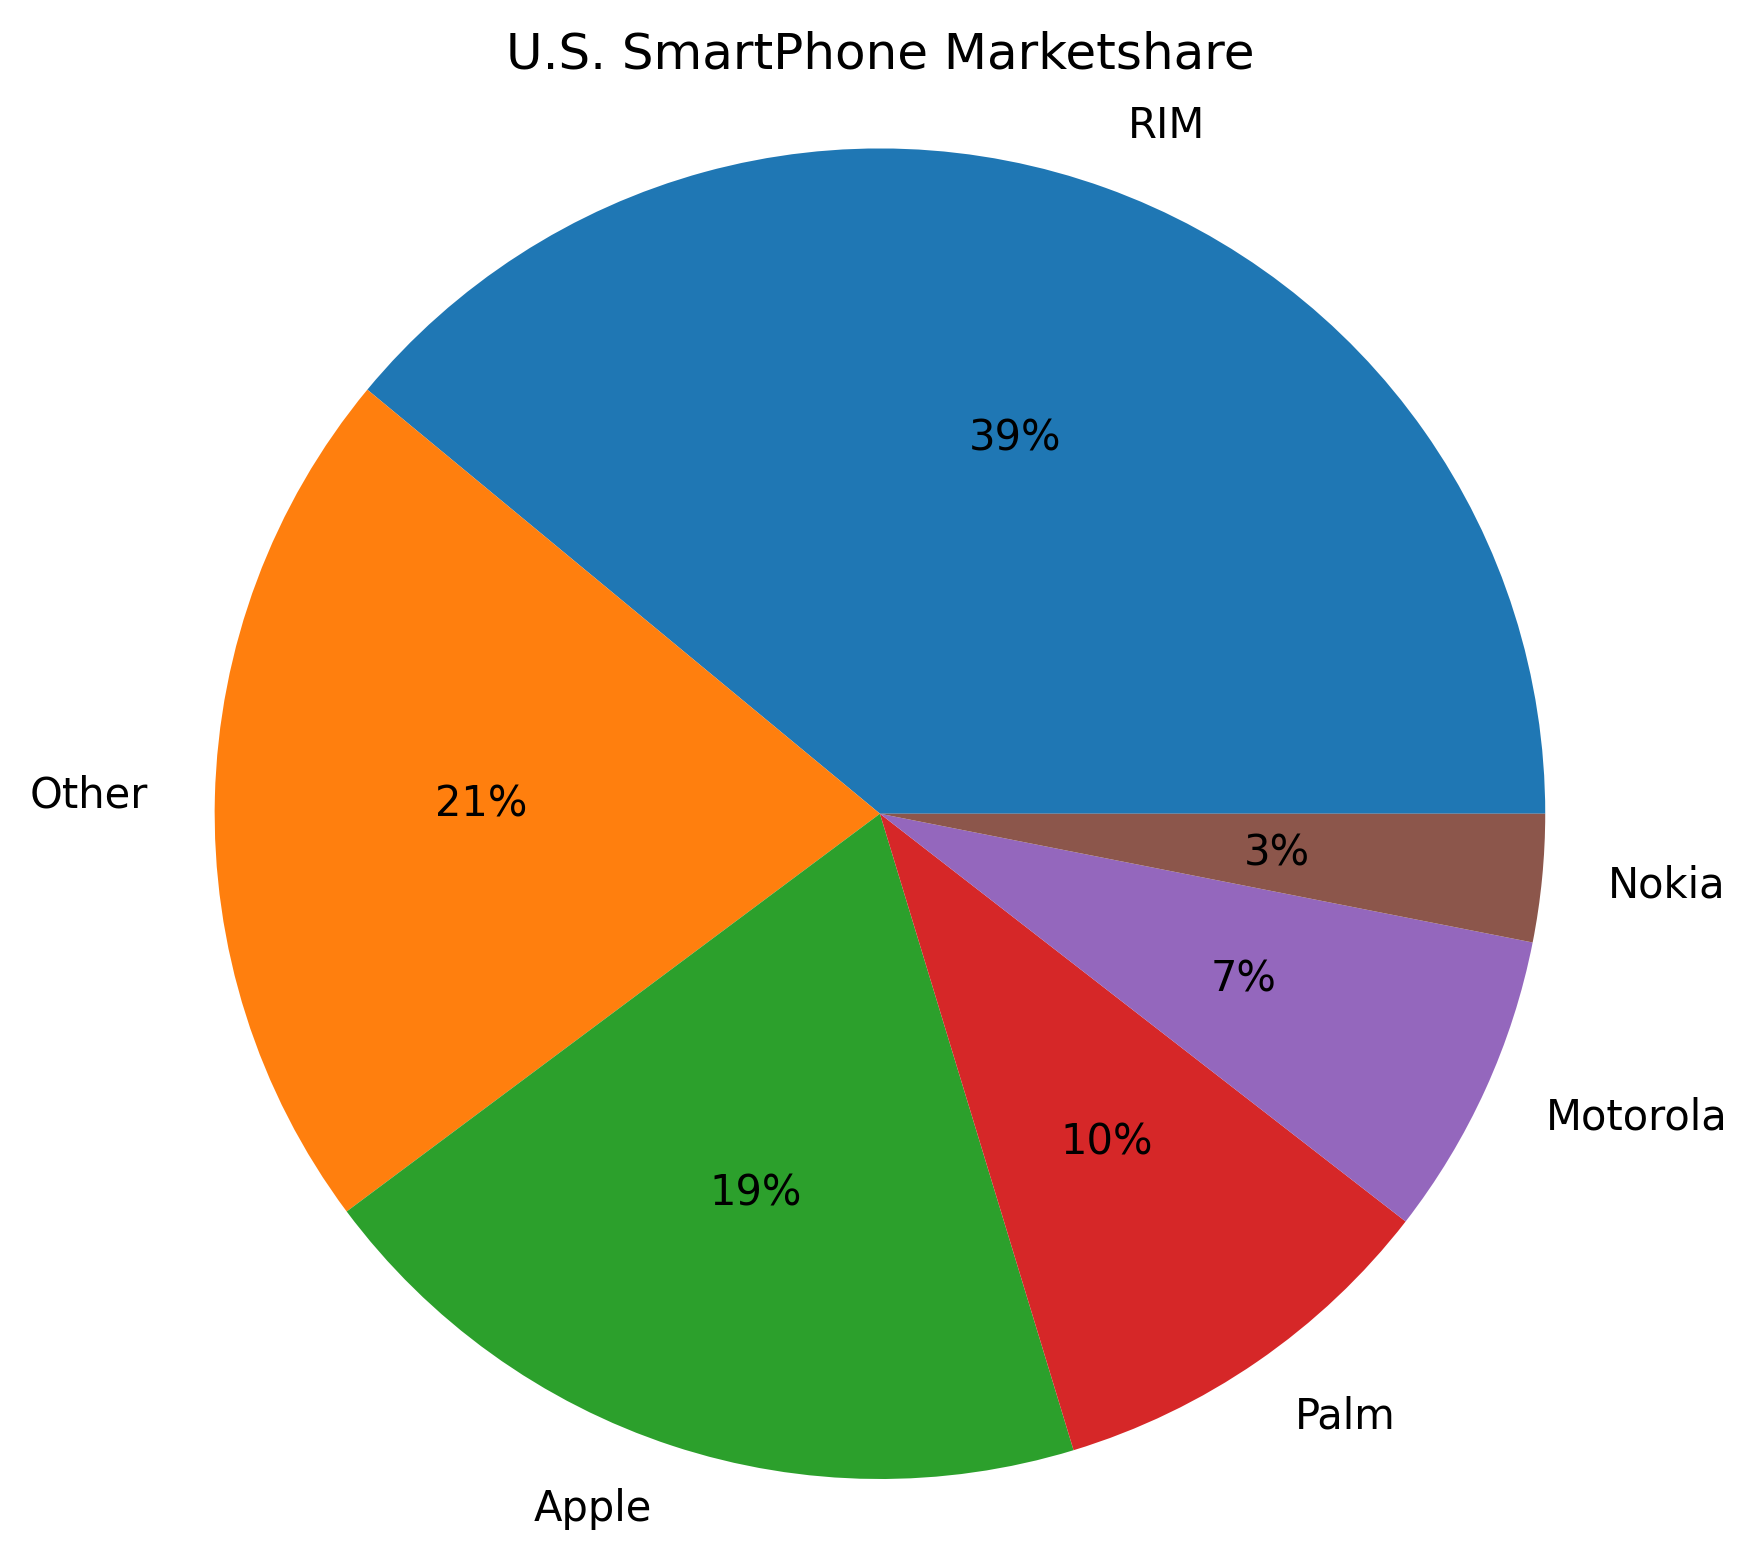

In [124]:
titres = ['RIM', 'Other', 'Apple', 'Palm', 'Motorola', 'Nokia']
infos = [39.0, 21.2, 19.5, 9.8, 7.4, 3.1]
plt.figure()
plt.title('U.S. SmartPhone Marketshare\n\n\n')
plt.pie(infos, labels=titres,
        autopct='%.0f%%',
        radius=1.5)
plt.show()

**Graphique 3** :
- Mauvaise lisibilité
- Une seule échelle
- Trop grande différence entre 8528 et 9140

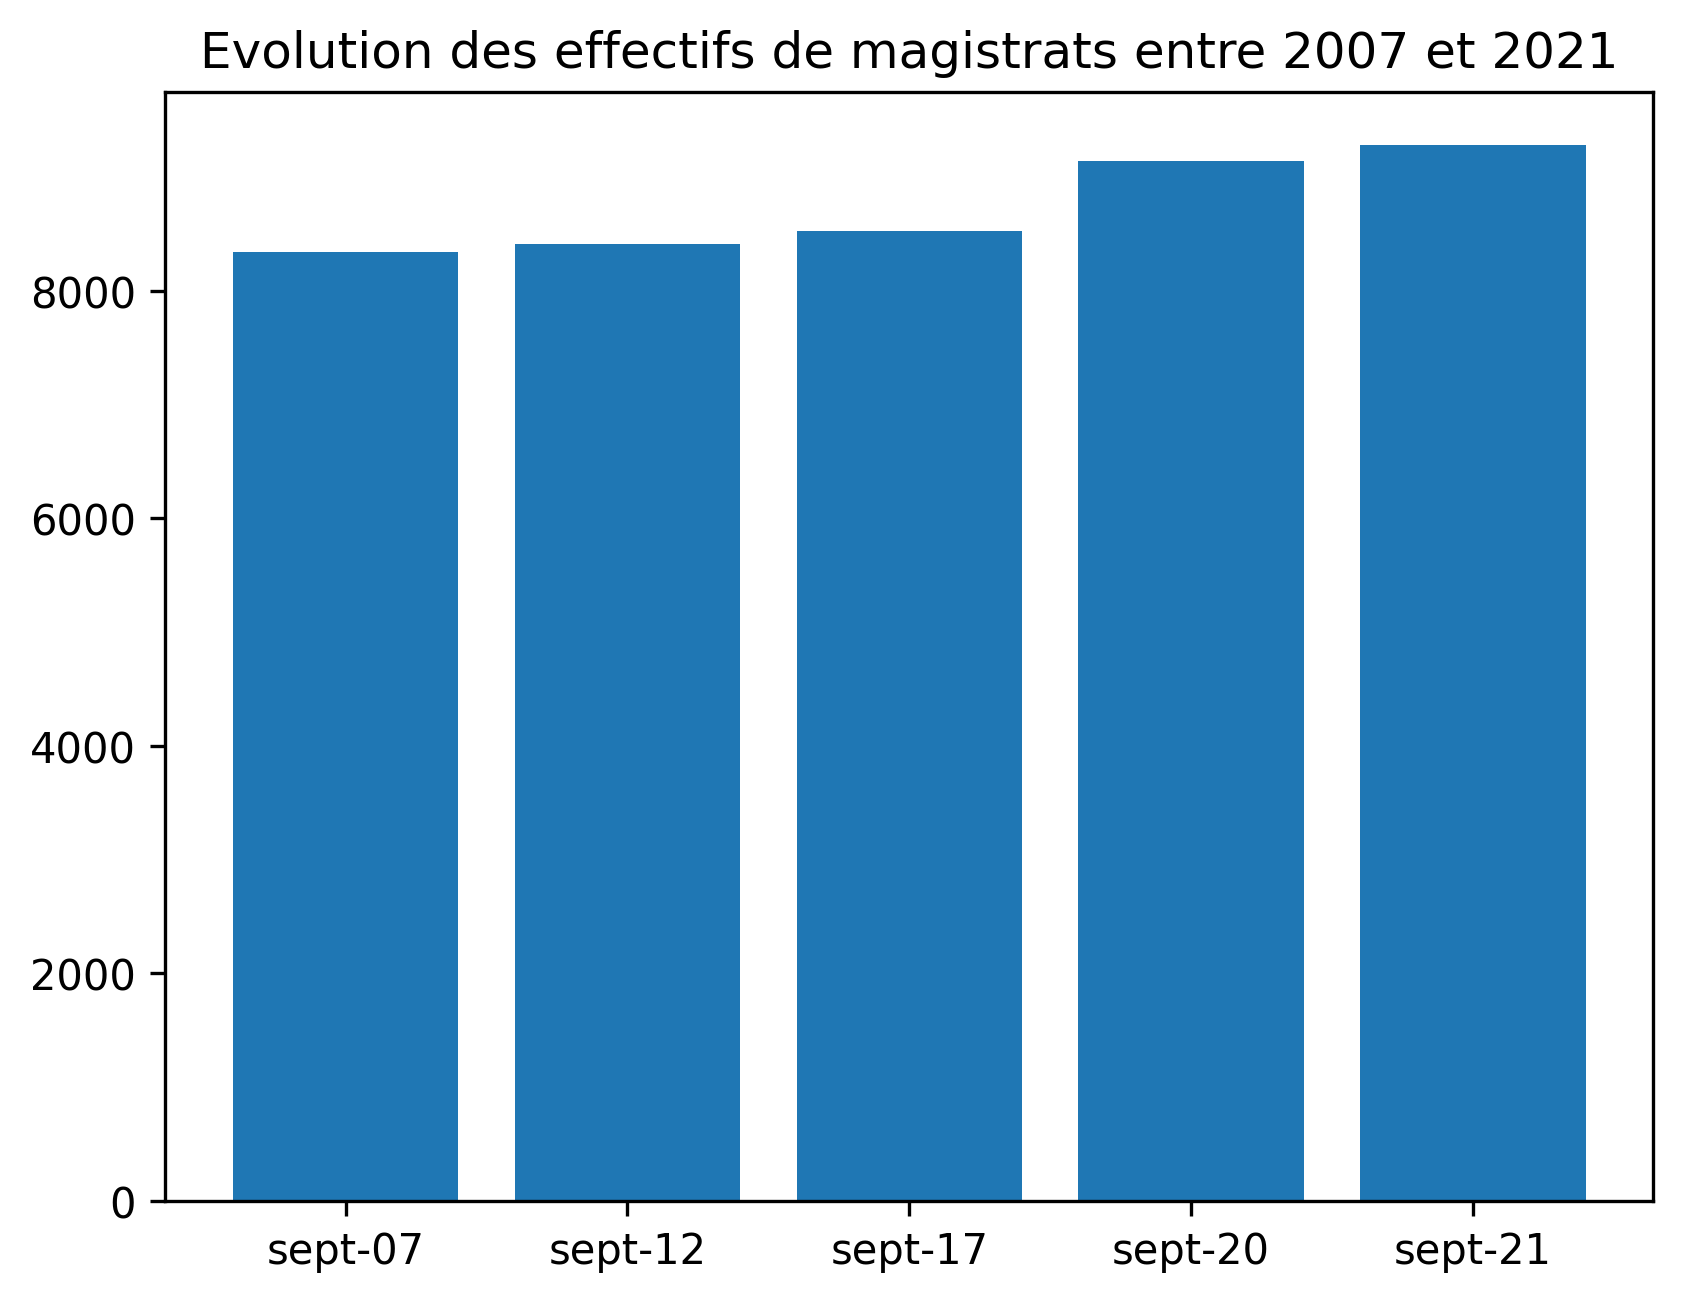

In [129]:
titres = ['sept-07', 'sept-12', 'sept-17', 'sept-20', 'sept-21']
infos = [8340, 8412, 8528, 9140, 9285]
plt.figure()
plt.title("Evolution des effectifs de magistrats entre 2007 et 2021")
plt.bar(titres, infos)
plt.show()

**Graphique 4** :
- Mauvaise lisibilité
- Opposition qui prend plus de la moitié du graphique (alors que 48%)

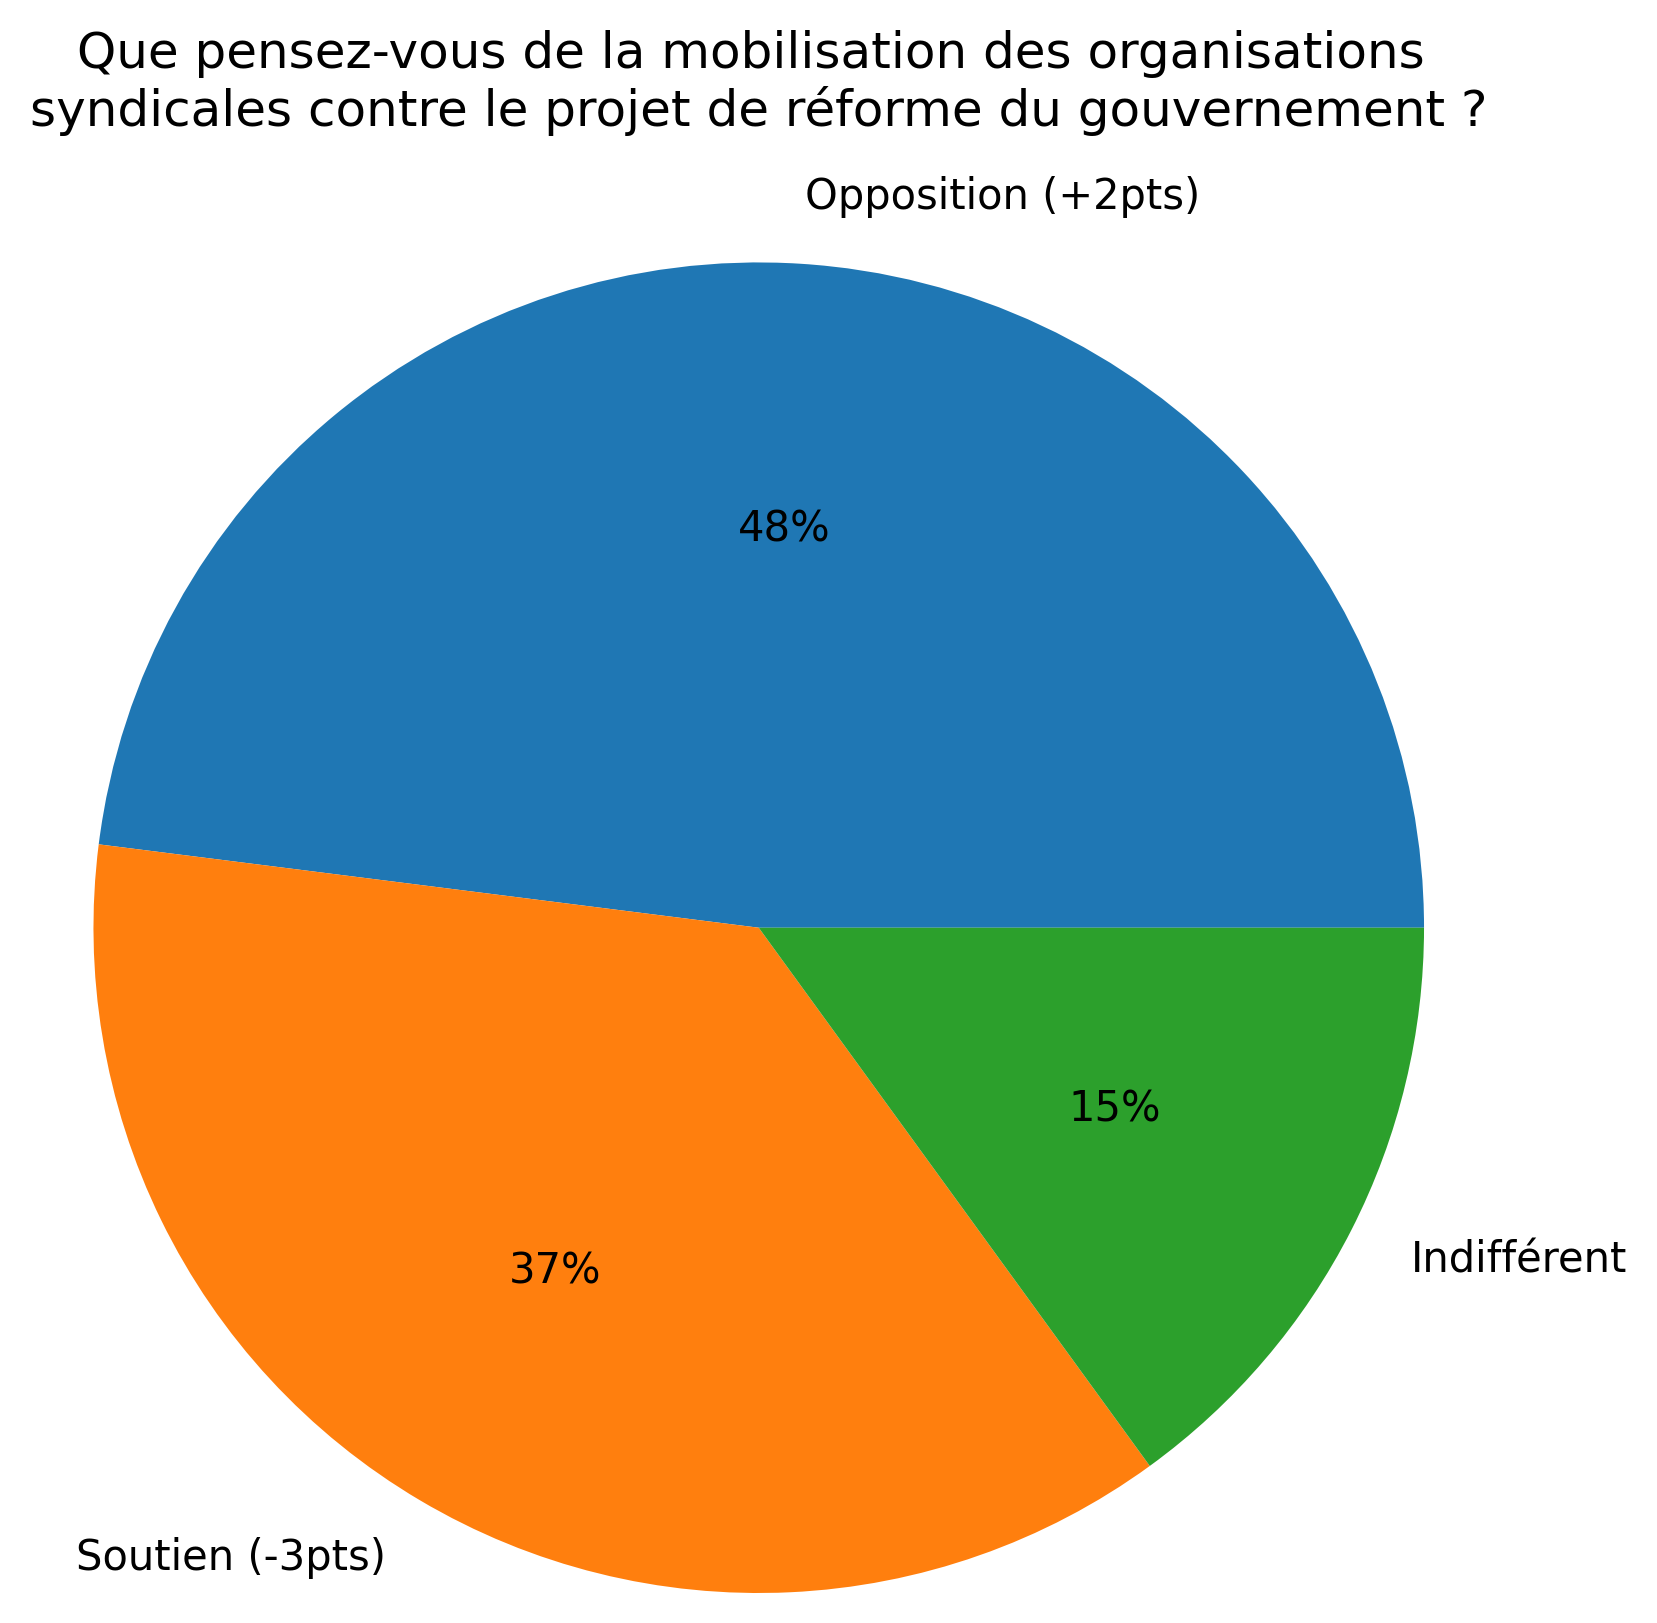

In [136]:
titres = ['Opposition (+2pts)', 'Soutien (-3pts)', 'Indifférent']
infos = [48, 37, 15]
plt.figure()
plt.title('Que pensez-vous de la mobilisation des organisations \nsyndicales contre le projet de réforme du gouvernement ?\n\n\n\n')
plt.pie(infos, labels=titres,
        autopct='%.0f%%',
        radius=1.5)
plt.show()

**Graphique 5** :
- Mauvaise lisibilité
- Aucune échelle
- Titres des parties trop loin

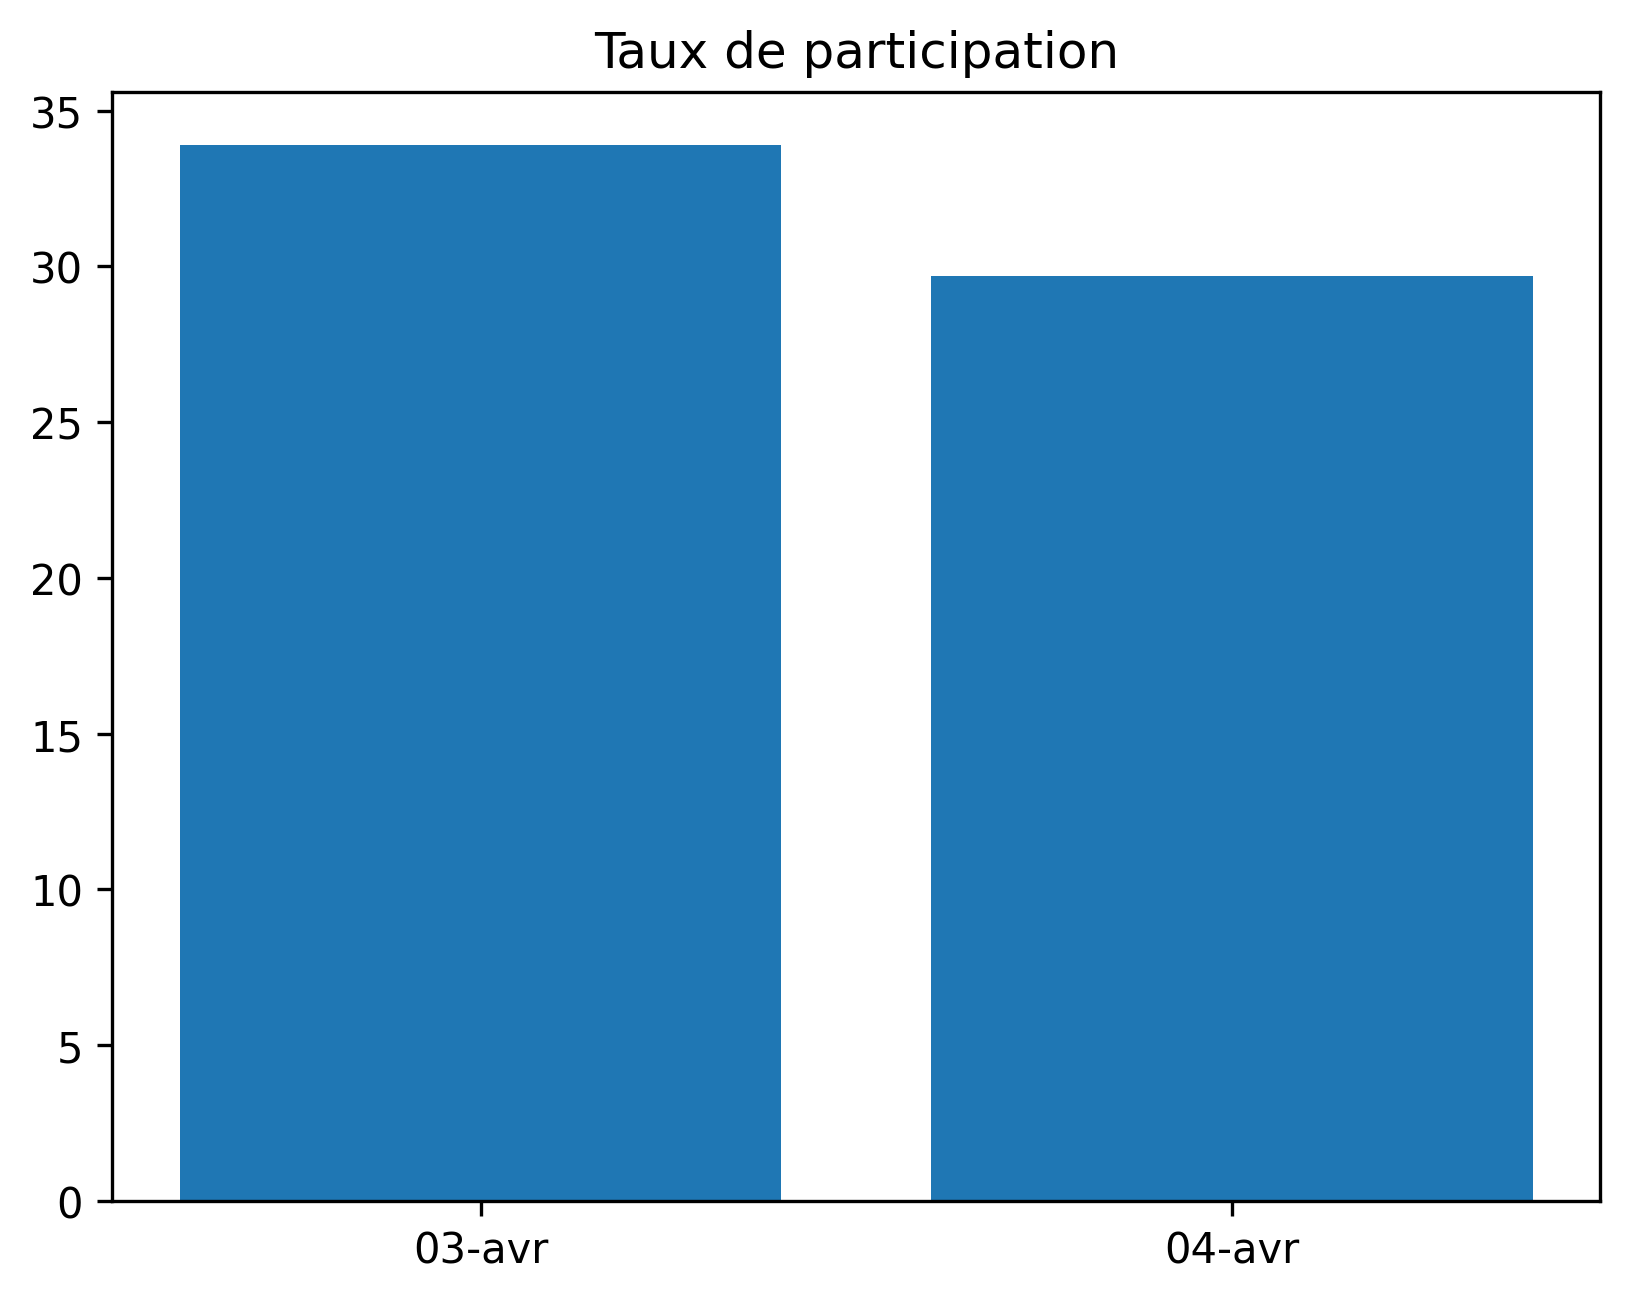

In [137]:
titres = ['03-avr', '04-avr']
infos = [33.9, 29.7]
plt.figure()
plt.title("Taux de participation")
plt.bar(titres, infos)
plt.show()

### 4.2 Le problème des données groupées

#### Exercice : Données groupées et perte d'information

In [154]:
# Dictionnaire contenant les données groupées
# clé : (a,b) ---> intervalle de note ]a,b] (sauf pour le premier où le 0 est inclus)
# valeur : n  ---> nombre de notes comprises dans l'intervalle
data = {(0,5):  18, 
        (5,10):  7, 
        (10,15):13, 
        (15,20):10}

In [155]:
data2 = []
for cle, value in data.items():
    data2 += [(cle[0]+cle[1])/2]*value
print(data2)
print(f"Moyenne : {round(mean(data2), 2)}")

[2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 12.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5, 17.5]
Moyenne : 9.06


In [156]:
data = [2.8, 2.9, 2.9, 3.1, 3.2, 3.4, 3.4, 3.5, 3.6, 3.8, 4.0, 4.0, 4.1, 4.3, 
        4.5, 4.7, 4.8, 4.8, 7.9, 8.2, 8.6, 8.7, 9.3, 9.4, 9.6, 12.8, 13.0, 
        13.1, 13.2, 13.2, 13.4, 13.7, 13.8, 13.9, 14.1, 14.1, 14.2, 14.7, 17.8, 
        18.1, 18.9, 19.0, 19.1, 19.1, 19.3, 19.6, 19.7, 19.9]

In [158]:
print(data)
print(f"Moyenne : {round(mean(data), 2)}")

[2.8, 2.9, 2.9, 3.1, 3.2, 3.4, 3.4, 3.5, 3.6, 3.8, 4.0, 4.0, 4.1, 4.3, 4.5, 4.7, 4.8, 4.8, 7.9, 8.2, 8.6, 8.7, 9.3, 9.4, 9.6, 12.8, 13.0, 13.1, 13.2, 13.2, 13.4, 13.7, 13.8, 13.9, 14.1, 14.1, 14.2, 14.7, 17.8, 18.1, 18.9, 19.0, 19.1, 19.1, 19.3, 19.6, 19.7, 19.9]
Moyenne : 10.36


### 4.3 Problèmes liés à la moyenne et à la médiane

#### Exercice : Moyenne ou médiane ?

In [159]:
salaires_A = [1243, 1278, 120124, 1394, 1296, 1289, 1303, 1083, 1291, 1337,
              1075, 1361, 1259, 1138, 1188, 1217, 1164, 1535, 1283, 1275, 
              1146, 1196, 1237, 1191, 1389, 1210, 1067, 1094, 1249, 1239, 
              1262, 1294, 1360, 1276, 1208, 1234, 1091, 1306, 1089, 1148, 
              1185, 1192, 1186, 1075, 1057, 1221, 1291, 1421, 120099, 1348, 
              1089, 1171, 1290, 1071, 1235, 1202, 1304, 120118, 1396, 1293, 
              1280, 1225, 1237, 1297, 1242, 120029, 1179, 1115, 1105, 1146, 
              120044, 1296, 1268, 1288, 1102, 1123, 1308, 1244, 1099, 1147, 
              1098, 1406, 1275, 1206, 1377, 1243, 1152, 1138, 1205, 1132, 
              1221, 1370, 1328, 1138, 1279, 1081, 1109, 1316, 1291, 1213, 
              1159, 119901, 1148, 1090, 1288, 1234, 1241, 120016, 1326, 
              1165, 119917, 1148, 119949, 1133, 1019, 1212, 119925, 1281, 
              1367, 1102, 1241, 1188, 1281, 1389, 1092, 1163, 1227, 1191, 
              1228, 1056, 1106, 1151, 1162, 1229, 1334, 1243, 119959, 1208, 
              1177, 1217, 1133, 1364, 1147, 119931, 1149, 1211, 1181, 1213, 
              1389, 1199, 1249, 1291, 1137, 1055, 1211, 1307, 1141, 1098, 
              1048, 1238, 1071, 1277, 120116, 120047]

In [161]:
print(f"Moyenne : {round(mean(salaires_A), 2)}")
print(f"Médiane : {round(median(salaires_A), 2)}")

Moyenne : 11357.81
Médiane : 1228.5


In [162]:
salaires_B = [119965, 1217, 1124, 1379, 1129, 120063, 119930, 1104, 120120, 1348, 120128, 
            1226, 1173, 120024, 120032, 119862, 120056, 1305, 119902, 120098, 1166, 1180, 
            1061, 119816, 119929, 1226, 119944, 119847, 120094, 1089, 1298, 1103, 1205, 
            119782, 119904, 119875, 119954, 120162, 1322, 120031, 1100, 1123, 990, 120020, 
            119851, 120098, 1121, 120070, 1372, 1299, 119926, 1192, 119870, 120020, 1293, 
            120003, 1242, 1343, 119999, 1063, 120056, 1306, 1230, 119825, 1308, 1289, 1172, 
            1122, 120096, 120014, 1358, 1248, 120010, 1137, 1184, 120202, 1088, 119818, 
            120066, 1103, 1109, 1259, 1323, 119762, 1113, 1152, 119969, 119783, 119934, 
            1220, 119896, 120023, 119893, 120191, 1219, 120027, 119874, 120152, 1337]

In [163]:
print(f"Moyenne : {round(mean(salaires_B), 2)}")
print(f"Médiane : {round(median(salaires_B), 2)}")

Moyenne : 61192.28
Médiane : 119762


## 5 Transformation d’une variable

### 5.1 Transformation logarithmique

#### Exercice : Logarithme

In [164]:
data = [1.65, 3.67, 1.96, 0.77, 0.45, 2.25, 0.47, 7.93, 0.77, 1.01,
        0.53, 0.31, 0.25, 0.55, 0.14, 0.27, 4.05, 3.11, 0.27, 1.27, 
        2.33, 9.81, 1.07, 0.02, 0.55, 1.93, 0.09, 2.35, 6.16, 0.05, 
        0.02, 7.17, 11.55, 3.21, 1.36, 7.97, 0.3, 1.82, 2.0, 0.02, 
        2.12, 1.02, 0.49, 0.17, 0.03, 2.36, 0.08, 0.51, 0.09, 0.94, 
        2.71, 0.29, 8.55, 0.47, 10.14, 1.04, 2.01, 0.39, 1.07, 1.64, 
        4.23, 2.11, 0.08, 0.1, 0.01, 1.5, 7.66, 0.07, 0.37, 2.75, 
        1.64, 0.84, 0.01, 0.3, 2.97, 6.28, 0.29, 0.02, 0.03, 4.68, 
        0.61, 5.73, 1.08, 5.03, 8.55, 1.52, 4.55, 0.47, 0.28, 0.39, 
        1.16, 1.3, 0.08, 1.96, 0.76, 0.21, 0.43, 6.64, 7.05, 0.01]

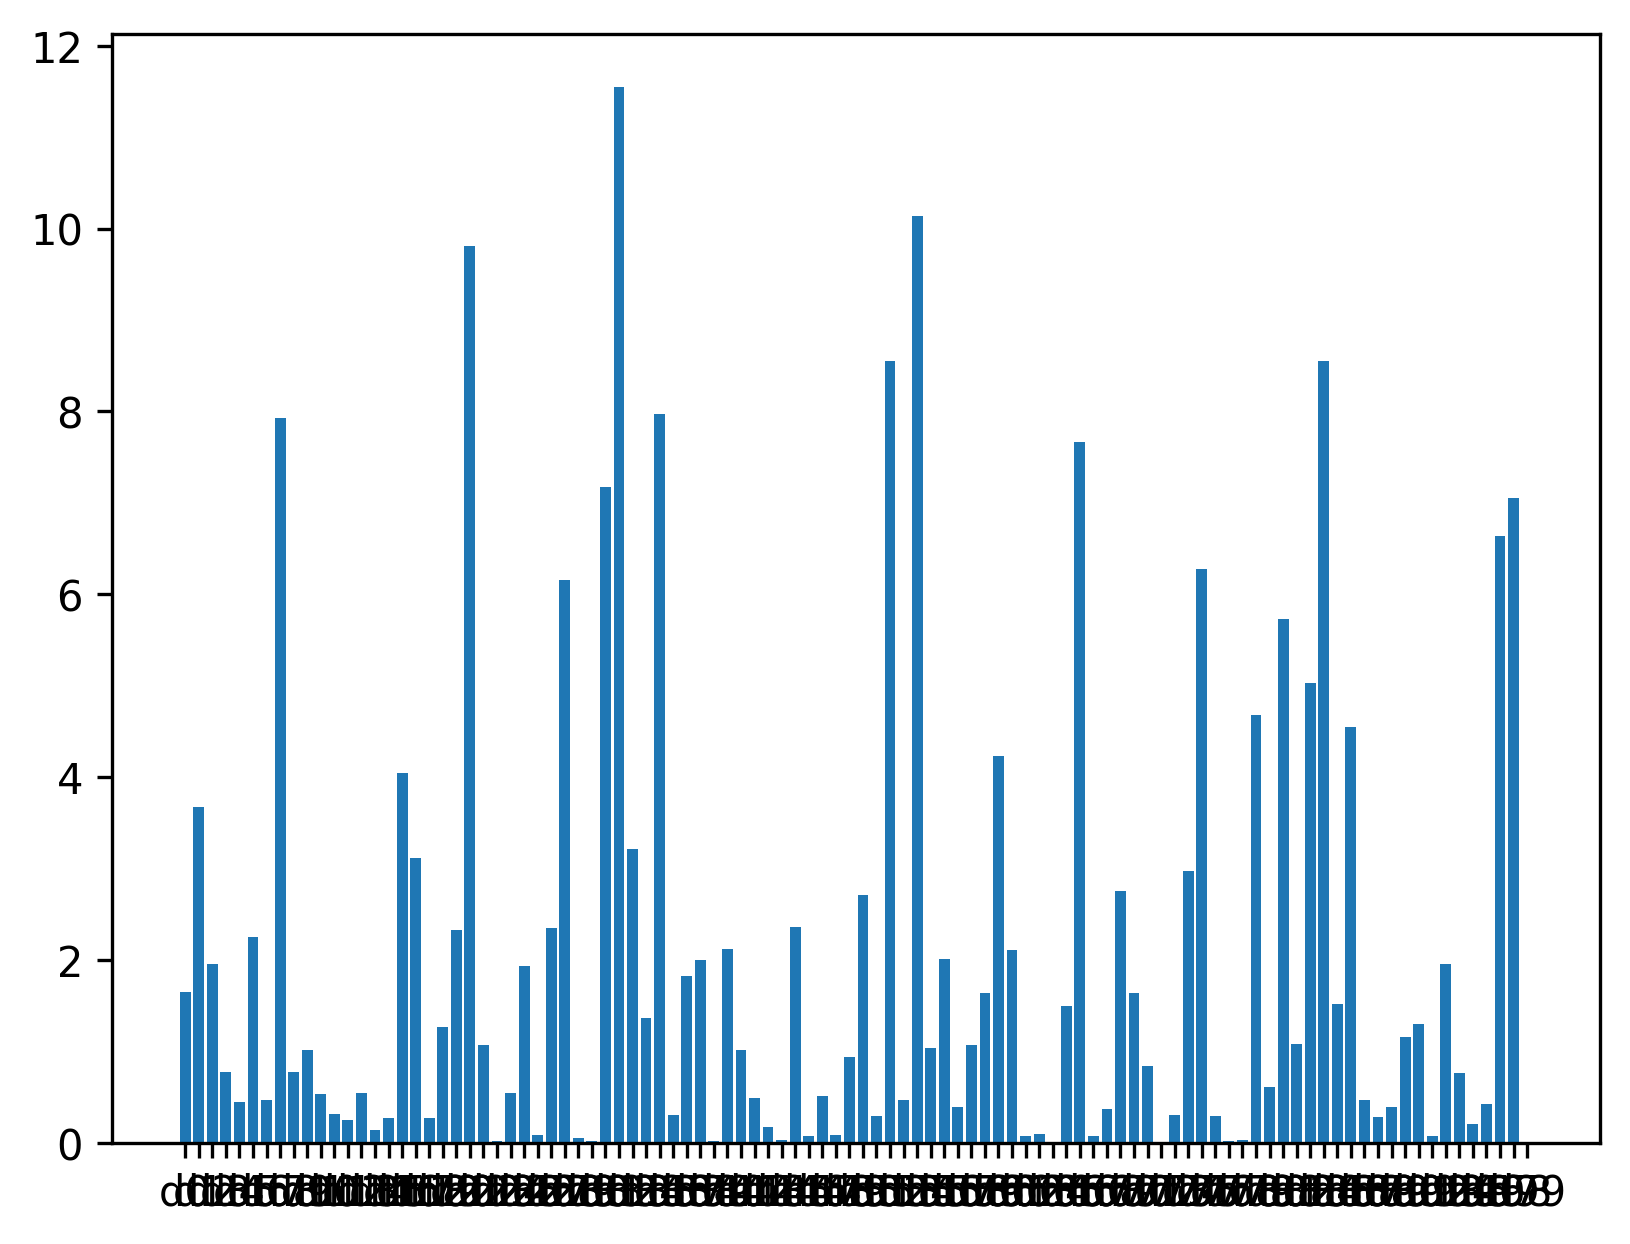

In [178]:
titres = []
for i in range(len(data)):
    titres += [f"d{i}"]
plt.figure()
plt.bar(titres, data)
plt.show()

In [182]:
import math
data2 = list(map(math.log, data))

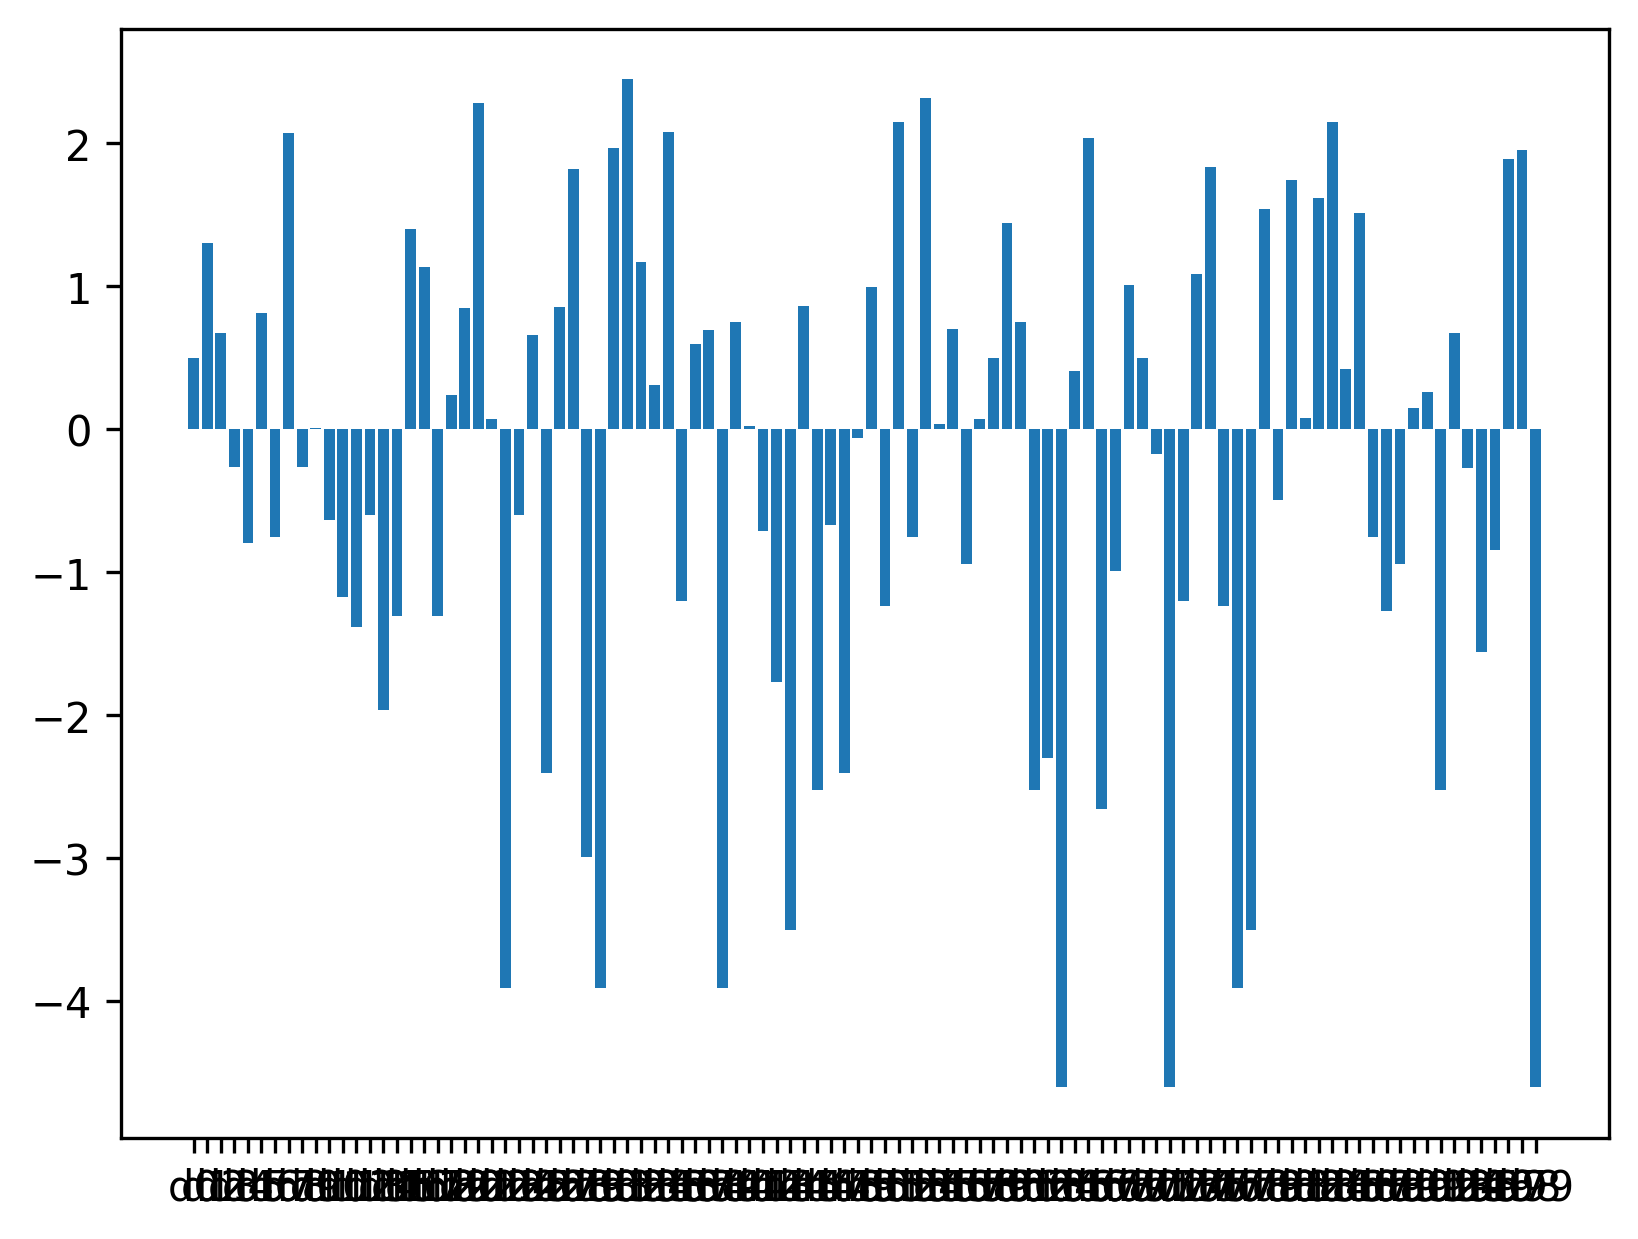

In [183]:
titres = []
for i in range(len(data)):
    titres += [f"d{i}"]
plt.figure()
plt.bar(titres, data2)
plt.show()

### 5.2 Transformation en rangs

#### Exercice : Rangs

In [208]:
def to_ranks(data: list) -> list:
    sorted_data = sorted(data)
    rang = []
    for i in range(len(data)):
        for j in range(len(sorted_data)):
            if sorted_data[j] == data[i]:
                rang += [j+1]
    return rang

In [209]:
to_ranks([3,8,1,11,7,4])

[2, 5, 1, 6, 4, 3]

In [210]:
data = [9.4531, 11.6358, 11.0114, 13.6833, 22.5199, 6.9069, 9.6858, 10.1612, 9.6639, 13.7164, 
        -0.1524, 9.3856, 5.6784, 12.4886, 4.4473, 9.5456, 10.3225, 13.1786, 13.4331, 5.8983, 
        9.9682, 9.1689, 8.3763, 8.3065, 11.2544, 3.9533, 13.1199, 9.8712, 9.3393, 10.1274, 
        8.3552, 14.1878, 4.4704, 6.5326, 14.853, 12.9896, 16.5132, 6.4729, 14.0004, 16.0347, 
        7.4854, 10.9724, 8.6938, 14.3512, 13.6721, 12.412, 16.6542, 7.3041, 17.4611, 10.977, 
        7.8374, 13.8277, 4.136, 5.4403, 11.4788, 10.3844, 14.0403, 5.1948, 3.6954, 8.7836, 
        7.0702, 9.4915, 13.9402, 9.4944, 12.3044, 12.7221, 14.4586, 11.0558, 12.657, 13.5342, 
        14.2622, 8.9576, 12.7594, 16.9846, 18.5019, 6.4132, 7.3614, 13.0121, 10.0488, 5.572, 
        8.7635, 7.2641, 12.6194, 16.1174, 6.9511, 9.6203, 12.4084, 10.3873, 10.1446, 13.3794, 
        9.9577, 10.2323, 7.4461, 8.7361, 15.8436, 9.0257, 13.1165, 10.529, 7.8485, 8.843]

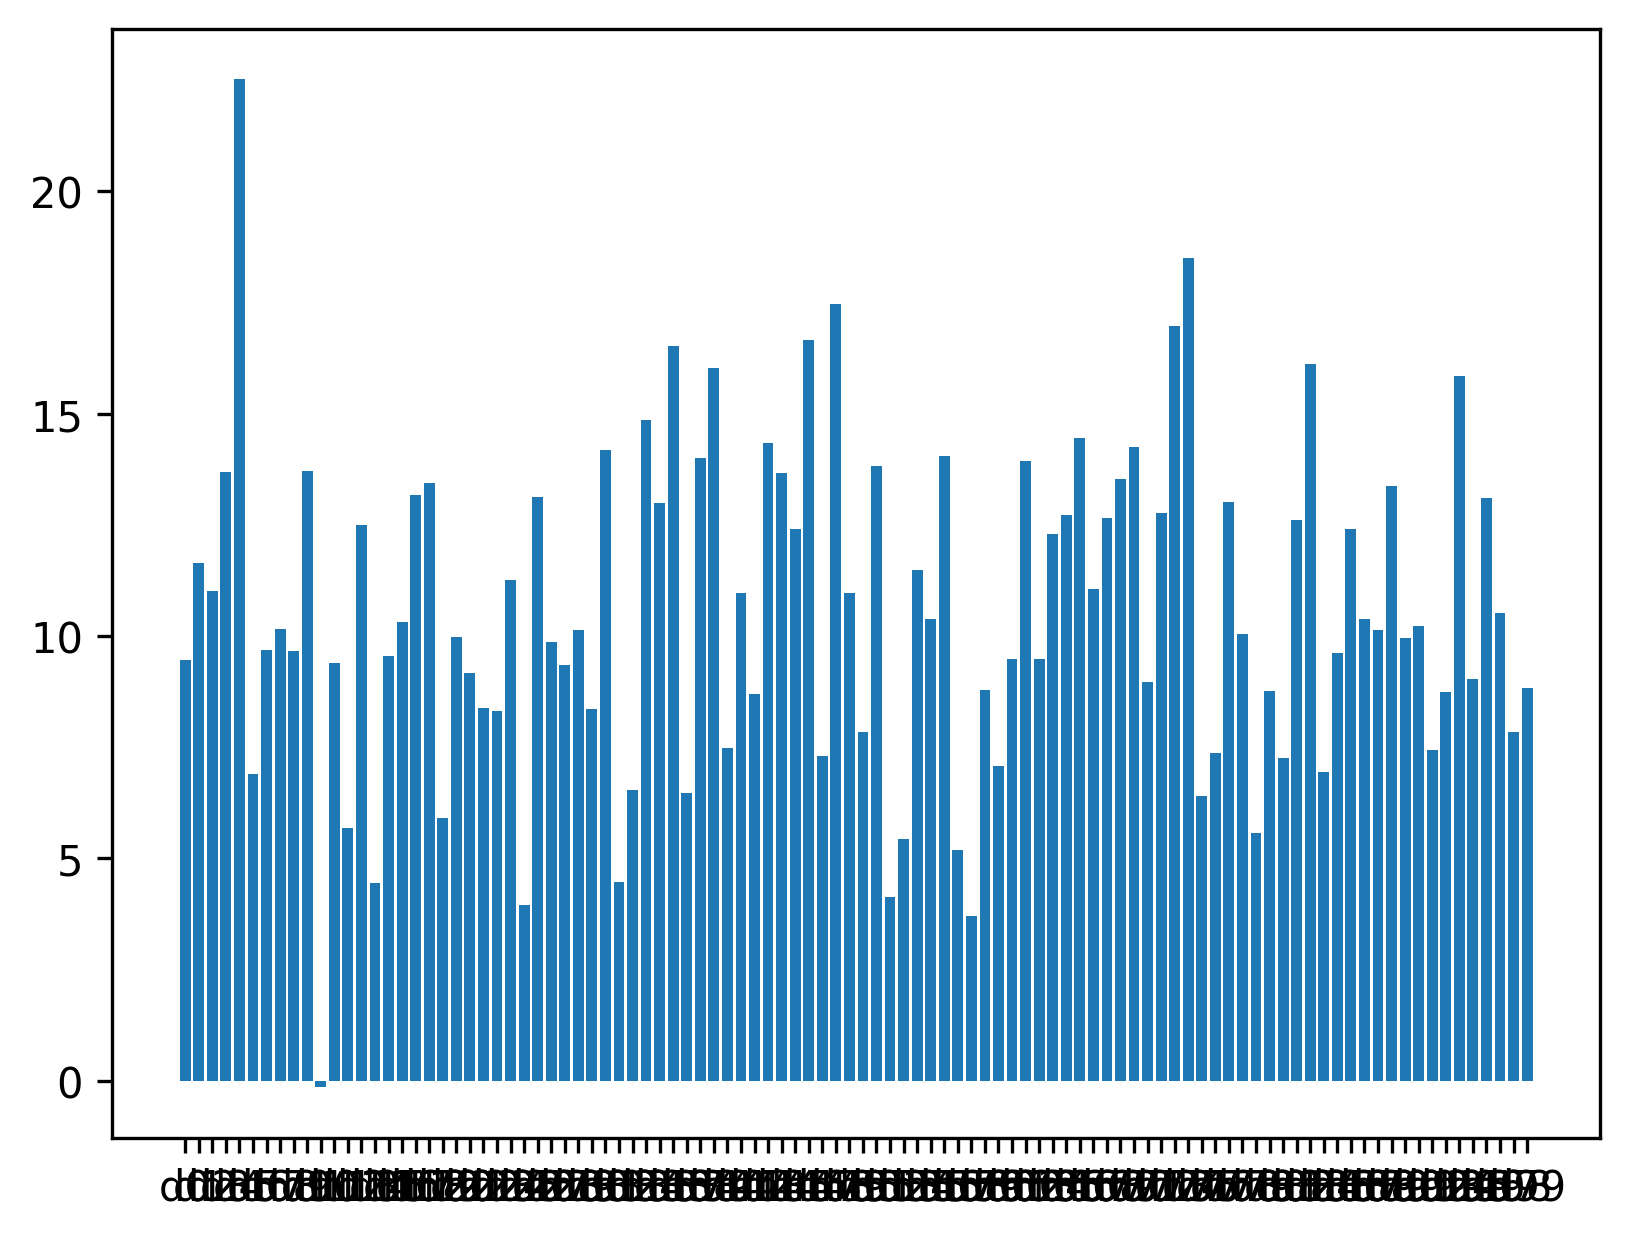

In [211]:
titres = []
for i in range(len(data)):
    titres += [f"d{i}"]
plt.figure()
plt.bar(titres, data)
plt.show()

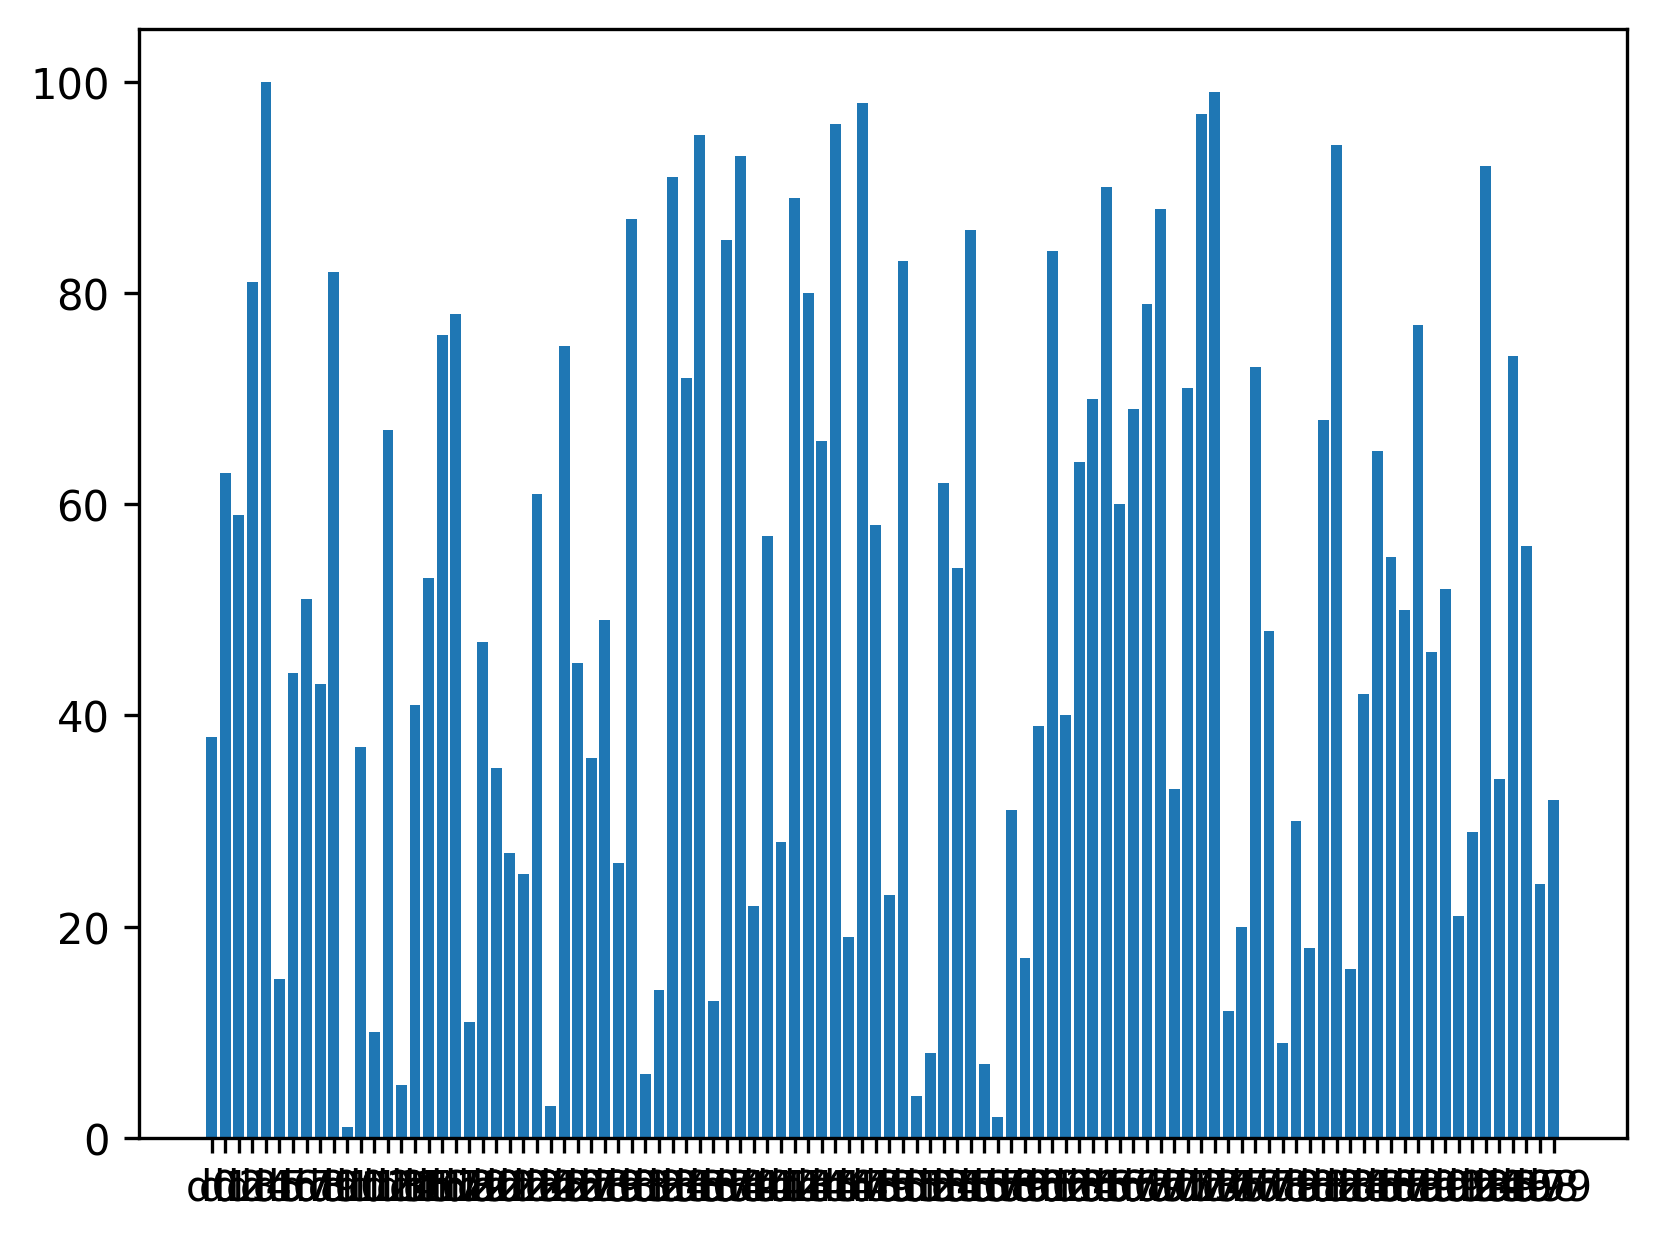

In [212]:
data2 = to_ranks(data)
titres = []
for i in range(len(data2)):
    titres += [f"d{i}"]
plt.figure()
plt.bar(titres, data2)
plt.show()

#### [facultatif]

In [215]:
import scipy.stats as sp
import random
import time

def compare(f1, f2, size, rep):
    s_dtf1 = [0.0] * rep
    s_dtf2 = [0.0] * rep
    for i in range(rep) :
        data = [random.random()] * size
        t1 = time.time()
        data2 = f1(data)
        t2 = time.time()
        s_dtf1[i] = t2 - t1
        t1 = time.time()
        data2 = f2(data)
        t2 = time.time()
        s_dtf2[i] = t2 - t1
    print(f"Première fonction : \n temps moyen : {mean(s_dtf1)} (écart-type : {stdev(s_dtf1)}")
    print(f"Deuxième fonction : \n temps moyen : {mean(s_dtf2)} (écart-type : {stdev(s_dtf2)}")
    return None

compare(to_ranks, sp.rankdata, 100000, 100)

KeyboardInterrupt: 

### 5.3 Centrage et réduction

#### Exercice : Normalisation

In [219]:
data = [6.6, 8.9, 11.6, 5.5, 7.8, 13.3, 14.7, 6.8, 8.8, 19.5, 
        14.1, 9.7, 10.4, 11.0, 15.2, 16.4, 15.4, 13.3, 9.2, 10.7, 
        9.4, 11.8, 13.2, 15.9, 12.3, 15.6, 12.0, 5.7, 18.7, 15.6, 
        13.7, 16.2, 6.9, 13.4, 15.3, 21.0, 11.5, 17.8, 13.5, 15.5, 
        10.8, 18.0, 0.0, 9.4, 12.7, 12.4, 16.0, 4.2, 16.2, 3.5, 
        9.8, 11.6, 15.3, 8.9, 9.5, 16.8, 10.8, 15.2, 11.0, 11.3, 
        11.5, 13.7, 11.1, 19.3, 20.9, 7.9, 9.7, 11.4, 9.8, 18.7, 
        14.3, 17.3, 9.9, 16.6, 11.2, 19.0, 13.7, 13.8, 17.9, 9.6, 
        16.7, 19.7, 10.1, 9.4, 13.9, 5.0, 16.1, 10.9, 9.9, 14.0, 
        5.0, 7.9, 25.6, 11.6, 15.2, 15.7, 11.4, 5.8, 16.0, 14.2]

In [220]:
print(f"Moyenne : {round(mean(data), 2)}")
print(f"Écart-type : {round(stdev(data), 2)}")

Moyenne : 12.59
Écart-type : 4.3


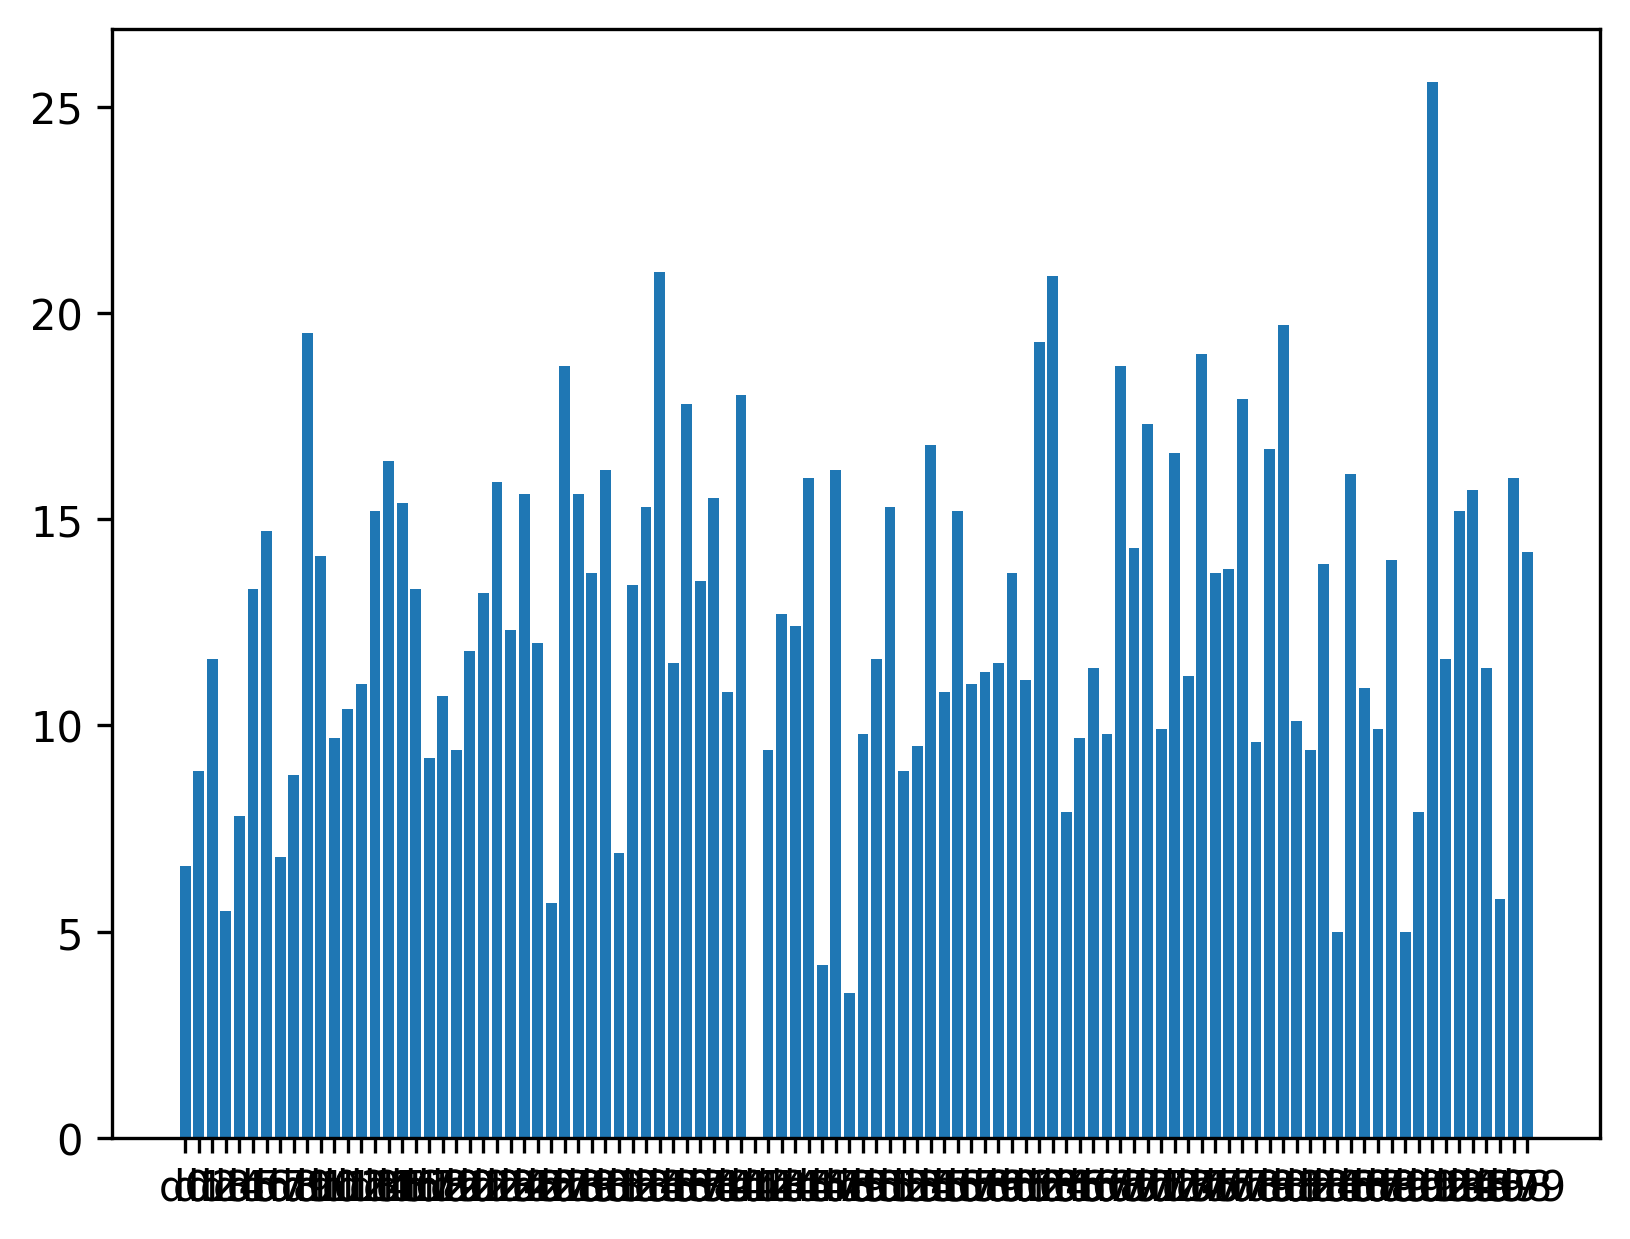

In [221]:
titres = []
for i in range(len(data2)):
    titres += [f"d{i}"]
plt.figure()
plt.bar(titres, data)
plt.show()

In [225]:
def scale(data: list, center: bool, scale: bool) -> list:
    moy = mean(data)
    ecartp = stdev(data)
    if center:
        for i in range(len(data)):
            data[i] -= moy
    if scale:
        for i in range(len(data)):
            data[i] /= ecartp
    return data

In [226]:
scale([0,1,2,3,4,5,6,7,8,9], center=True, scale=False)

[-4.5, -3.5, -2.5, -1.5, -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]

In [227]:
scale([0,1,2,3,4,5,6,7,8,9], center=True, scale=True)

[-1.5666989036012806,
 -1.2185435916898848,
 -0.8703882797784892,
 -0.5222329678670935,
 -0.17407765595569785,
 0.17407765595569785,
 0.5222329678670935,
 0.8703882797784892,
 1.2185435916898848,
 1.5666989036012806]

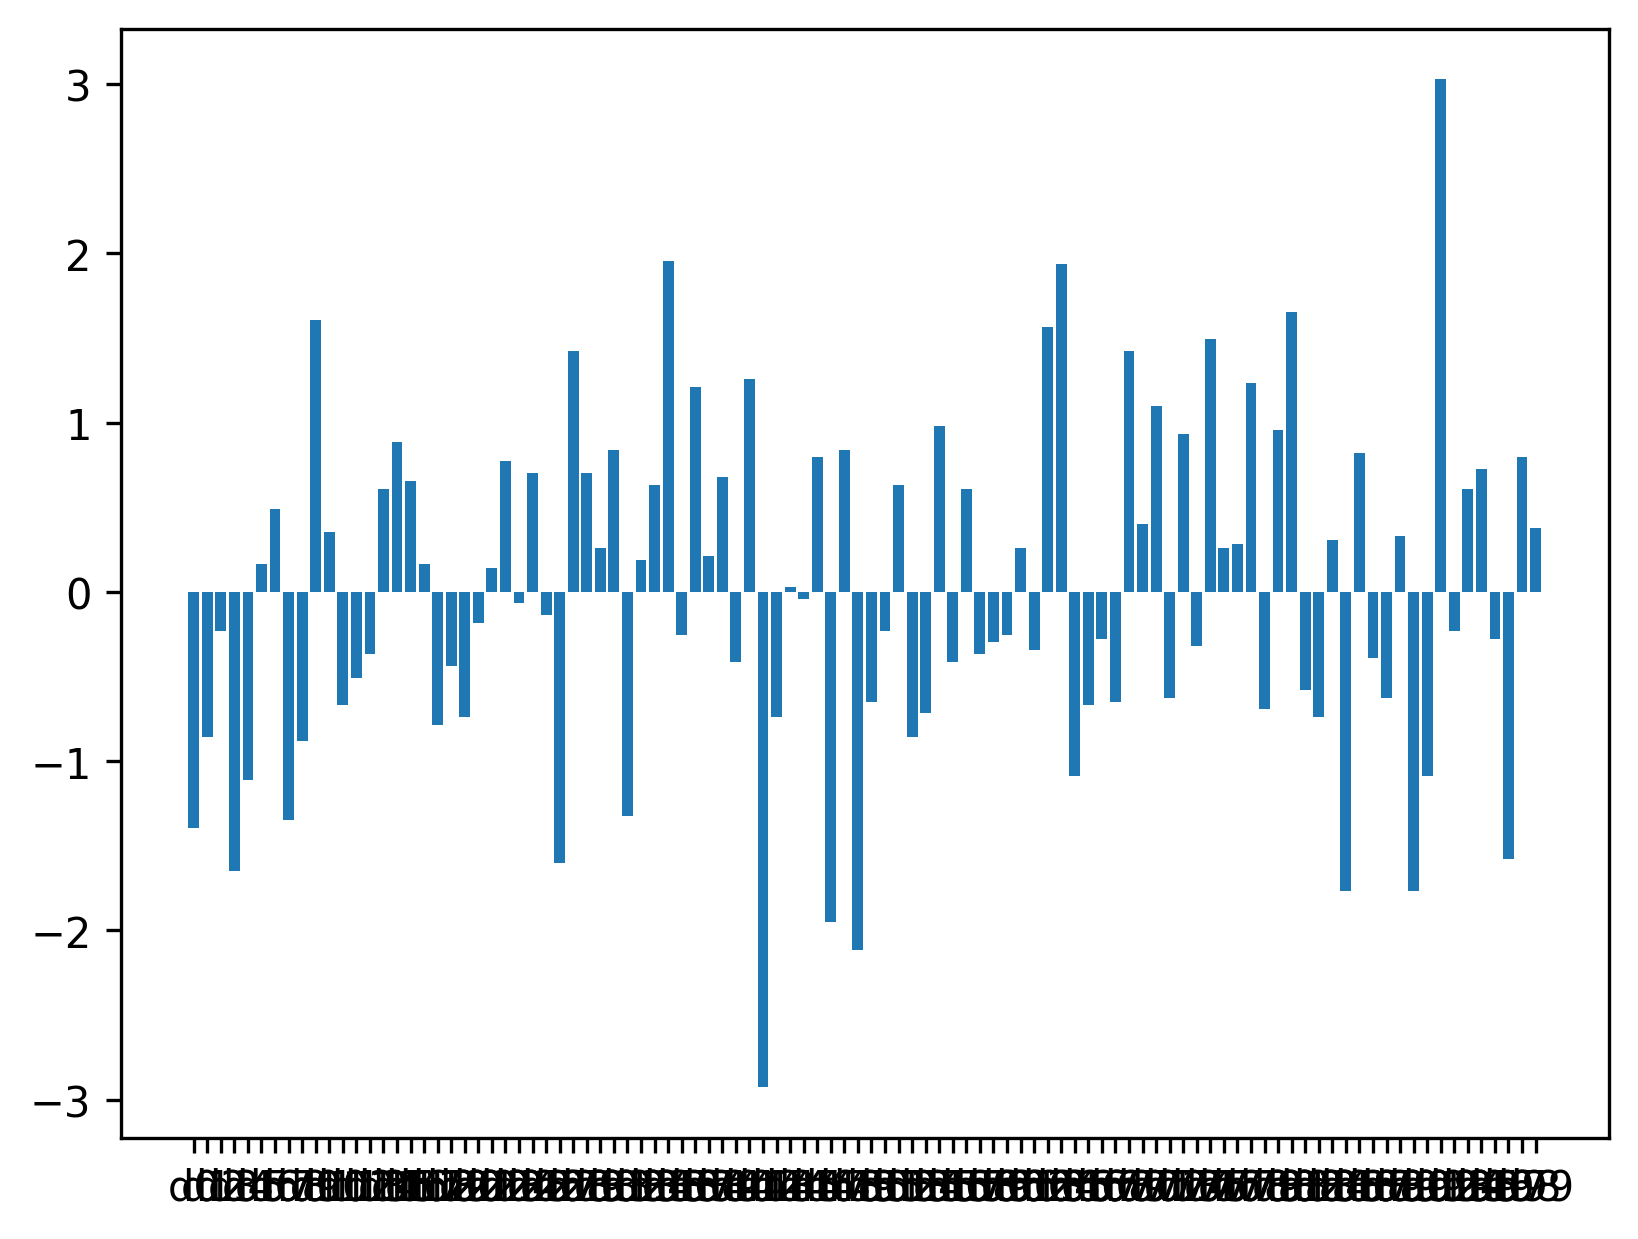

In [230]:
scale_data = scale(data, True, True)
titres = []
for i in range(len(scale_data)):
    titres += [f"d{i}"]
plt.figure()
plt.bar(titres, scale_data)
plt.show()

#### Synthèse

1. Identification de la nature de la variable
2. Transformation éventuelle
3. Choix d’un graphique adapté
4. Choix d’un ou deux indicateurs de position
5. Choix d’un ou plusieurs indicateurs de dispersion
6. Identification d’incohérences ou de différences suspectes
7. Retour éventuel à la deuxième étape